In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Asthma prevalence (County vs California) - 2001 to 2019

In [3]:
asthma= pd.read_csv("/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/Health_data_processed/Asthma_prevalence_counties_2001to2019.csv")

In [4]:
dict = {'Percentage': 'County_Percentage',
        '95% CI': 'County_95% CI',
        'Population': 'County_Population'}
asthma.rename(columns=dict, inplace=True)

In [5]:
asthma.head()

,County,Year,Ever diagnosed with asthma,County_Percentage,County_95% CI,County_Population,County_total,California_Percentage,California_95% CI,California_Population,California_total
0,Imperial,2001,Has asthma,12.5,10.0 - 15.0,17000,137000,12.0,11.7 - 12.4,4011000,33378000
1,Imperial,2003,Has asthma,14.2,11.2 - 17.1,21000,146000,13.1,12.7 - 13.6,4548000,34618000
2,Imperial,2005,Has asthma,14.7,11.0 - 18.4,23000,155000,13.6,13.1 - 14.1,4837000,35574000
3,Imperial,2007,Has asthma,16.6,9.6 - 23.6,27000,163000,13.6,13.2 - 14.0,4944000,36265000
4,Imperial,2009,Has asthma,13.2,9.4 - 17.0,22000,170000,13.7,13.0 - 14.3,5040000,36844000


In [6]:
asthma.shape

(56, 11)

## ED visits and Hospitalizations (2015 -2018)

In [7]:
edvisits= pd.read_csv("/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/Health_data_processed/asthma-emergency-department-visit-rates-by-county-2015_2018.csv", encoding='unicode_escape') 

In [8]:
edvisits

,COUNTY,YEAR,STRATA,STRATA_NAME,AGE_GROUP,NUMBER_OF_EDVISITS,AGE-ADJUSTED_EDVISIT_RATE,COMMENT
0,Imperial,2015,Total population,All ages,All ages,1388.0,71.2,NaN
1,Imperial,2015,Child vs. adult,0 to 17 years,0 to 17 years,737.0,140.1,NaN
2,Imperial,2015,Child vs. adult,18+ years,18+ years,651.0,47.2,NaN
3,Imperial,2015,Age groups,0 to 4 years,0 to 4 years,161.0,100.9,NaN
4,Imperial,2015,Age groups,5 to 17 years,5 to 17 years,576.0,154.5,NaN
...,...,...,...,...,...,...,...,...
91,Riverside,2018,Race/ethnicity,White,All ages,2588.0,34.8,NaN
92,Riverside,2018,Race/ethnicity,Black,All ages,1742.0,122.1,NaN
93,Riverside,2018,Race/ethnicity,Hispanic,All ages,3932.0,32.4,NaN
94,Riverside,2018,Race/ethnicity,Asian/PI,All ages,259.0,18.5,NaN


In [9]:
edvisits['STRATA'].unique()

array(['Total population', 'Child vs. adult', 'Age groups',
       'Race/ethnicity'], dtype=object)

In [10]:
edvisits['STRATA_NAME'].unique()

array(['All ages', '0 to 17 years', '18+ years', '0 to 4 years',
       '5 to 17 years', '18 to 64 years', '65+ years', 'White', 'Black',
       'Hispanic', 'Asian/PI', 'AI/AN'], dtype=object)

### Hospitalizations

In [11]:
hospitalizations= pd.read_csv("/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/Health_data_processed/asthma-hospitalization-rates-by-county-2015_2018.csv", encoding='unicode_escape')
hospitalizations

,COUNTY,YEAR,STRATA,STRATA_NAME,AGE_GROUP,NUMBER_OF_HOSPITALIZATIONS,AGE-ADJUSTED_HOSPITALIZATION_RATE,COMMENT
0,Imperial,2015,Total population,All ages,All ages,173.0,8.7,NaN
1,Imperial,2015,Child vs. adult,0 to 17 years,0 to 17 years,115.0,21.3,NaN
2,Imperial,2015,Child vs. adult,18+ years,18+ years,58.0,4.3,NaN
3,Imperial,2015,Age groups,0 to 4 years,0 to 4 years,45.0,28.0,NaN
4,Imperial,2015,Age groups,5 to 17 years,5 to 17 years,70.0,18.8,NaN
...,...,...,...,...,...,...,...,...
91,Riverside,2018,Race/ethnicity,White,All ages,260.0,3.3,NaN
92,Riverside,2018,Race/ethnicity,Black,All ages,99.0,7.3,NaN
93,Riverside,2018,Race/ethnicity,Hispanic,All ages,346.0,2.9,NaN
94,Riverside,2018,Race/ethnicity,Asian/PI,All ages,19.0,1.6,NaN


## Merge two dataframes of edvisits and hospitalizations

In [12]:
asthma_stats=pd.merge(edvisits, hospitalizations, how='left', left_on=['COUNTY','YEAR','STRATA','STRATA_NAME','AGE_GROUP'], right_on = ['COUNTY','YEAR','STRATA','STRATA_NAME','AGE_GROUP'])
asthma_stats

,COUNTY,YEAR,STRATA,STRATA_NAME,AGE_GROUP,NUMBER_OF_EDVISITS,AGE-ADJUSTED_EDVISIT_RATE,COMMENT_x,NUMBER_OF_HOSPITALIZATIONS,AGE-ADJUSTED_HOSPITALIZATION_RATE,COMMENT_y
0,Imperial,2015,Total population,All ages,All ages,1388.0,71.2,NaN,173.0,8.7,NaN
1,Imperial,2015,Child vs. adult,0 to 17 years,0 to 17 years,737.0,140.1,NaN,115.0,21.3,NaN
2,Imperial,2015,Child vs. adult,18+ years,18+ years,651.0,47.2,NaN,58.0,4.3,NaN
3,Imperial,2015,Age groups,0 to 4 years,0 to 4 years,161.0,100.9,NaN,45.0,28.0,NaN
4,Imperial,2015,Age groups,5 to 17 years,5 to 17 years,576.0,154.5,NaN,70.0,18.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...
91,Riverside,2018,Race/ethnicity,White,All ages,2588.0,34.8,NaN,260.0,3.3,NaN
92,Riverside,2018,Race/ethnicity,Black,All ages,1742.0,122.1,NaN,99.0,7.3,NaN
93,Riverside,2018,Race/ethnicity,Hispanic,All ages,3932.0,32.4,NaN,346.0,2.9,NaN
94,Riverside,2018,Race/ethnicity,Asian/PI,All ages,259.0,18.5,NaN,19.0,1.6,NaN


In [13]:
asthma_stats.isnull().sum()

COUNTY                                0
YEAR                                  0
STRATA                                0
STRATA_NAME                           0
AGE_GROUP                             0
NUMBER_OF_EDVISITS                    5
AGE-ADJUSTED_EDVISIT_RATE             5
COMMENT_x                            91
NUMBER_OF_HOSPITALIZATIONS           13
AGE-ADJUSTED_HOSPITALIZATION_RATE    14
COMMENT_y                            82
dtype: int64

In [14]:
asthma_stats.describe()

,YEAR,NUMBER_OF_EDVISITS,AGE-ADJUSTED_EDVISIT_RATE,NUMBER_OF_HOSPITALIZATIONS,AGE-ADJUSTED_HOSPITALIZATION_RATE
count,96.000000,91.000000,91.000000,83.000000,82.000000
mean,2016.500000,1908.120879,61.216484,210.144578,6.720732
std,1.123903,2411.696677,38.235389,247.937695,5.625882
min,2015.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.750000,179.500000,36.500000,36.000000,2.800000
50%,2016.500000,737.000000,47.200000,112.000000,5.150000
75%,2017.250000,2874.000000,72.500000,314.500000,8.875000
max,2018.000000,10111.000000,154.500000,1311.000000,28.000000


In [15]:
asthma_stats.groupby(by = "YEAR").sum()

,NUMBER_OF_EDVISITS,AGE-ADJUSTED_EDVISIT_RATE,NUMBER_OF_HOSPITALIZATIONS,AGE-ADJUSTED_HOSPITALIZATION_RATE
YEAR,,,,
2015,45551.0,1486.0,5872.0,185.9
2016,43121.0,1428.1,4366.0,142.9
2017,45033.0,1450.1,3755.0,112.8
2018,39934.0,1206.5,3449.0,109.5


In [16]:
total_edvisits=asthma_stats.groupby(by = "YEAR").sum().sort_values(by = "NUMBER_OF_EDVISITS", ascending = False)
total_hospitalizations=asthma_stats.groupby(by = "YEAR").sum().sort_values(by = "NUMBER_OF_HOSPITALIZATIONS", ascending = False)

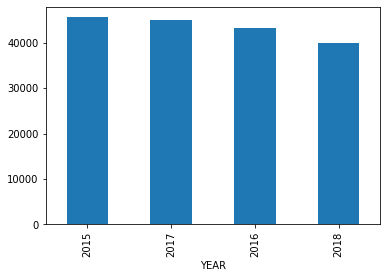

In [17]:
total_edvisits.NUMBER_OF_EDVISITS.plot(kind = "bar")

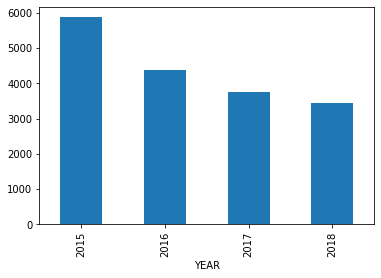

In [18]:
total_hospitalizations.NUMBER_OF_HOSPITALIZATIONS.plot(kind = "bar")

In [19]:
asthma_stats.to_csv('/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/Health_data_processed/Merged_edvisits_hosp.csv',index=False)

# Asthma ed visit rates by zipcode (2013-2018)

In [20]:
edvisitsbyzip= pd.read_csv("/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/Health_data_processed/asthmaedvisitratesbyzipandagegroup2013-2018.csv", encoding='unicode_escape') 
edvisitsbyzip

,Year,Zip_Code,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county
0,2018,91752,38,36.2,0-17,Riverside
1,2018,92201,87,46.3,0-17,Riverside
2,2018,92203,25,31.7,0-17,Riverside
3,2018,92220,60,84.7,0-17,Riverside
4,2018,92223,57,39.0,0-17,Riverside
...,...,...,...,...,...,...
1175,2013,92879,191,40.5,All Ages,Riverside
1176,2013,92880,185,28.2,All Ages,Riverside
1177,2013,92881,83,24.0,All Ages,Riverside
1178,2013,92882,222,32.2,All Ages,Riverside


In [21]:
edvisitsbyzip.isnull().sum()      # no missing values

Year                                0
Zip_Code                            0
Number_of_Asthma_ED_Visits          0
Age_Adjusted_Rate_of_Asthma_ED_V    0
Age_Group                           0
county                              0
dtype: int64

In [22]:
edvisitsbyzip.groupby(by = "Year").sum()

,Zip_Code,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V
Year,,,
2013,18212045,20757,10040.9
2014,18304909,21725,10463.5
2015,17935631,22428,10553.3
2016,18398175,21185,10051.4
2017,18212984,22224,10332.3
2018,18027568,19758,8882.4


In [23]:
edvisitsbyzip.Age_Group.value_counts()  

All Ages    423
18+         407
0-17        350
Name: Age_Group, dtype: int64

In [24]:
total_edvisitsbyzip=edvisitsbyzip.groupby(by = "Year").sum().sort_values(by = "Number_of_Asthma_ED_Visits", ascending = False)

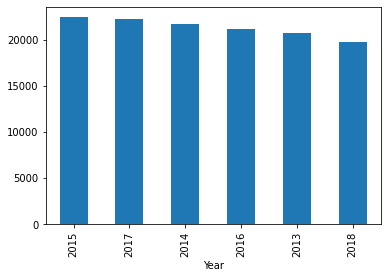

In [25]:
total_edvisitsbyzip.Number_of_Asthma_ED_Visits.plot(kind = "bar")

# Load Weather data - Temperature

In [26]:
temp= pd.read_csv('/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/Health_data_processed/Yearly weather data/Meteorological_Temperature(2013-2018).csv', encoding='unicode_escape')
temp

,Basin,County,Monitoring_Site,Maximum,1-Day_Average,Year
0,SS,Imperial,Bombay Beach,114,97,2013
1,SS,Imperial,Brawley-220 Main Street,119,102,2013
2,SS,Imperial,Buttercup,119,102,2013
3,SS,Imperial,Cahuilla,114,98,2013
4,SS,Imperial,Calexico-Ethel Street,82,67,2013
...,...,...,...,...,...,...
205,SS,Riverside,Palm Springs Regional Airport,120,108,2018
206,SS,Riverside,PINYON,105,92,2018
207,SS,Riverside,Salton Sea Park,116,103,2018
208,SS,Riverside,Thermal South,114,101,2018


In [27]:
temp['Monitoring_Site'] = temp['Monitoring_Site'].apply(lambda x: str(x).replace(u'\xa0', u''))
temp['County'] = temp['County'].apply(lambda x: str(x).replace(u'\xa0', u''))
temp['Basin'] = temp['Basin'].apply(lambda x: str(x).replace(u'\xa0', u''))

In [28]:
temp['Monitoring_Site'].unique()

array(['Bombay Beach', 'Brawley-220 Main Street', 'Buttercup', 'Cahuilla',
       'Calexico-Ethel Street', 'Calipatria - Mulberry',
       'El Centro Naval Air Facility #2', 'El Centro-9th Street',
       'Fish Creek Mountains', 'Imperial County Airport', 'Meloland',
       'Naval Test Base', 'Niland-English Road', 'Palo Verde II',
       'Salton City', 'Salton Sea East', 'Seeley', 'Sonny Bono',
       'Squaw Lake', 'Thermal-Jacqueline Cochran Regional Airport',
       'UC-Andrade', 'Westmorland North', 'Cathedral City', 'Indio #3',
       'Indio-Jackson Street', 'Joshua Tree National Park',
       'La Quinta II', 'Mecca-90-333 Avenue', 'Oasis', 'PINYON',
       'Palm Springs Regional Airport', 'Palm Springs-Fire Station',
       'Salton Sea Park', 'Thermal South', 'Torres-Martinez',
       'Mecca-66275 Martinez Road', 'Westmorland-W 1st Street',
       'Mecca-65705 Johnson Street', 'Joshua Tree NP-Cottonwood #2 '],
      dtype=object)

In [29]:
temp['1-Day_Average']=pd.to_numeric(temp['1-Day_Average'], errors='ignore')

In [30]:
temp['1-Day_Average']= temp['1-Day_Average'].astype(float)
temp['Maximum']= temp['Maximum'].astype(float)

In [31]:
gp=temp.groupby(['Year','County','Monitoring_Site']).mean() #'Monitoring_Site'

In [32]:
gp

Maximum  1-Day_Average
Year County    Monitoring_Site                                      
2013 Imperial  Bombay Beach                     114.0           97.0
               Brawley-220 Main Street          119.0          102.0
               Buttercup                        119.0          102.0
               Cahuilla                         114.0           98.0
               Calexico-Ethel Street             97.0           83.0
...                                               ...            ...
2018 Riverside Palm Springs Regional Airport    120.0          108.0
               Palm Springs-Fire Station        117.0          106.0
               Salton Sea Park                  116.0          103.0
               Thermal South                    114.0          101.0
               Torres-Martinez                  117.0          101.0

[190 rows x 2 columns]

In [33]:
gp.dtypes

Maximum          float64
1-Day_Average    float64
dtype: object

# Load surface area data

In [34]:
surface_area=pd.read_csv('/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/71_surface_area.csv')
surface_area

,date,surface area,error
0,1982-12-12,962.06,6.34
1,1983-01-29,966.33,11.00
2,1984-04-13,965.75,5.71
3,1984-04-29,966.01,5.16
4,1984-05-31,965.82,3.62
...,...,...,...
980,2019-12-10,860.79,6.20
981,2020-01-03,861.39,13.90
982,2020-01-11,858.89,7.34
983,2020-01-19,868.09,54.11


In [35]:
surface_area['Year'] = pd.DatetimeIndex(surface_area['date']).year

In [36]:
sa=surface_area.groupby(['Year']).mean()
sa.tail()

,surface area,error
Year,,
2016,888.358913,20.983478
2017,880.373269,32.749038
2018,873.179322,33.194746
2019,863.303824,13.796765
2020,862.145000,20.800000


# Load Atmospheric Pressure data

In [37]:
pressure=pd.read_csv('/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/Health_data_processed/Yearly weather data/Atmospheric Pressure_Summary_Data(2013-2018).csv', encoding='unicode_escape')
pressure

,Basin,County,Monitoring Site,Maximum (mph),1-Day Average (mph),Year
0,SS,Imperial,Bombay Beach,1107.90,1057.48,2013
1,SS,Imperial,Calexico-Ethel Street,1030.59,1027.20,2013
2,SS,Imperial,El Centro-9th Street,1034.78,1031.66,2013
3,SS,Imperial,Naval Test Base,1060.00,1059.31,2013
4,SS,Imperial,Niland-English Road,1038.64,1036.11,2013
...,...,...,...,...,...,...
58,SS,Imperial,Westmorland-W 1st Street,1032.99,1029.54,2018
59,SS,Riverside,Indio-Jackson Street,1028.31,1024.60,2018
60,SS,Riverside,Palm Springs-Fire Station,1008.40,1004.84,2018
61,SS,Riverside,Salton Sea Park,1039.59,1035.58,2018


In [38]:
pressure.dtypes

Basin                  object
County                 object
Monitoring Site        object
Maximum (mph)          object
1-Day Average (mph)    object
Year                    int64
dtype: object

In [39]:
pressure['Monitoring Site'] = pressure['Monitoring Site'].apply(lambda x: str(x).replace(u'\xa0', u''))
pressure['County'] = pressure['County'].apply(lambda x: str(x).replace(u'\xa0', u''))
pressure['Monitoring Site'] = pressure['Monitoring Site'].str.strip()

In [40]:
pressure['1-Day Average (mph)']=pd.to_numeric(pressure['1-Day Average (mph)'], errors='ignore')
#pressure = pressure.dropna(subset=['1-Day Average (mph)'])
pressure['1-Day_Average (mph)']= pressure['1-Day Average (mph)'].astype(float)
pressure['Maximum_(mph)']= pressure['Maximum (mph)'].astype(float)

In [41]:
gp=pressure.groupby(['Year','County','Monitoring Site']).mean()  #'Monitoring Site'
gp

1-Day_Average (mph)  Maximum_(mph)
Year County    Monitoring Site                                              
2013 Imperial  Bombay Beach                           1057.48        1107.90
               Calexico-Ethel Street                  1027.20        1030.59
               El Centro-9th Street                   1031.66        1034.78
               Naval Test Base                        1059.31        1060.00
               Niland-English Road                    1036.11        1038.64
...                                                       ...            ...
2018 Imperial  Westmorland-W 1st Street               1029.54        1032.99
     Riverside Indio-Jackson Street                   1024.60        1028.31
               Palm Springs-Fire Station              1004.84        1008.40
               Salton Sea Park                        1035.58        1039.59
               Torres-Martinez                        1033.10        1036.55

[63 rows x 2 columns]

# Load Wind data

In [42]:
wind=pd.read_csv('/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/Health_data_processed/Yearly weather data/Peak Wind Summary Data(2013-2018).csv', encoding='unicode_escape')
wind.head()

,Basin,County,Monitoring Site,Maximum (mph),1-Day Average (mph),Year
0,SS,Imperial,Buttercup,59.9,25.1,2013
1,SS,Imperial,Cahuilla,51.0,33.4,2013
2,SS,Imperial,El Centro Naval Air Facility #2,59.8,42.8,2013
3,SS,Imperial,Fish Creek Mountains,70.0,37.0,2013
4,SS,Imperial,Imperial County Airport,55.2,38.5,2013


In [43]:
wind['Monitoring Site'] = wind['Monitoring Site'].apply(lambda x: str(x).replace(u'\xa0', u''))
wind['County'] = wind['County'].apply(lambda x: str(x).replace(u'\xa0', u''))

In [44]:
wind['Monitoring Site'].unique()

array(['Buttercup', 'Cahuilla', 'El Centro Naval Air Facility #2',
       'Fish Creek Mountains', 'Imperial County Airport', 'Squaw Lake',
       'Thermal-Jacqueline Cochran Regional Airport', 'PINYON',
       'Palm Springs Regional Airport'], dtype=object)

In [45]:
wind.dtypes

Basin                   object
County                  object
Monitoring Site         object
Maximum (mph)          float64
1-Day Average (mph)    float64
Year                     int64
dtype: object

In [46]:
gp=wind.groupby(['Year','County','Monitoring Site']).mean()  #'Monitoring Site'
gp

Maximum (mph)  1-Day Average (mph)
Year County    Monitoring Site                                                                
2013 Imperial  Buttercup                                            59.90                 25.1
               Cahuilla                                             51.00                 33.4
               El Centro Naval Air Facility #2                      59.80                 42.8
               Fish Creek Mountains                                 70.00                 37.0
               Imperial County Airport                              55.20                 38.5
               Squaw Lake                                           51.00                 30.8
               Thermal-Jacqueline Cochran Regional Airport          49.50                 28.3
     Riverside PINYON                                               65.00                 42.0
               Palm Springs Regional Airport                        46.00                 31.8
2014 Imperial  Buttercup                                            42.00                 32.6
               Cahuilla                                             48.00                 30.5
               El Centro Naval Air Facility #2                      47.20                 39.8
               Fish Creek Mountains                                 66.00                 33.6
               Imperial County Airport                              51.80                 37.9
               Squaw Lake                                           41.00                  NaN
               Thermal-Jacqueline Cochran Regional Airport          43.70                  NaN
     Riverside PINYON                                               52.00                 35.9
               Palm Springs Regional Airport                        42.60                 24.3
2015 Imperial  Buttercup                                            46.00                 28.8
               Cahuilla                                             45.00                 30.4
               El Centro Naval Air Facility #2                      54.10                  NaN
               Fish Creek Mountains                                 53.90                 31.8
               Imperial County Airport                              48.30                 32.1
               Squaw Lake                                           39.00                  NaN
               Thermal-Jacqueline Cochran Regional Airport          42.60                 25.1
     Riverside PINYON                                               49.00                 34.8
               Palm Springs Regional Airport                        54.10                 27.2
2016 Imperial  Buttercup                                            45.00                 27.6
               Cahuilla                                             50.00                 26.6
               El Centro Naval Air Facility #2                      50.60                 38.6
               Fish Creek Mountains                                 30.05                 35.4
               Imperial County Airport                              50.60                 33.1
               Squaw Lake                                           31.00                  NaN
               Thermal-Jacqueline Cochran Regional Airport          46.00                 30.3
     Riverside PINYON                                               53.00                 39.4
               Palm Springs Regional Airport                        46.00                 27.2
2017 Imperial  Buttercup                                            39.00                 25.1
               Cahuilla                                             48.00                 26.6
               El Centro Naval Air Facility #2                      64.40                  NaN
               Fish Creek Mountains                                 59.90                 40.2
               Imperial County Airport                              58

# Load Dewpoint data

In [47]:
dew_point=pd.read_csv('/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/Health_data_processed/Yearly weather data/Dew point Summary Data(2013-2018).csv', encoding='unicode_escape')
dew_point

,Basin,County,Monitoring Site,Maximum (deg F),1-Day Average (deg F),Year
0,SS,Imperial,Bombay Beach,81,75.0,2013
1,SS,Imperial,Buttercup,82,73.0,2013
2,SS,Imperial,Cahuilla,78,73.0,2013
3,SS,Imperial,Calipatria - Mulberry,81,79.0,2013
4,SS,Imperial,El Centro Naval Air Facility #2,79,75.0,2013
...,...,...,...,...,...,...
138,SS,Riverside,Palm Springs Regional Airport,80,71.0,2018
139,SS,Riverside,PINYON,76,68.0,2018
140,SS,Riverside,Salton Sea Park,82,77.0,2018
141,SS,Riverside,Thermal South,80,76.0,2018


In [48]:
dew_point['Monitoring Site'] = dew_point['Monitoring Site'].apply(lambda x: str(x).replace(u'\xa0', u''))
dew_point['County'] = dew_point['County'].apply(lambda x: str(x).replace(u'\xa0', u''))
dew_point['Monitoring Site'] = dew_point['Monitoring Site'].str.strip()

In [49]:
dew_point['Monitoring Site'].unique()

array(['Bombay Beach', 'Buttercup', 'Cahuilla', 'Calipatria - Mulberry',
       'El Centro Naval Air Facility #2', 'Fish Creek Mountains',
       'Imperial County Airport', 'Meloland', 'Naval Test Base',
       'Palo Verde II', 'Salton City', 'Salton Sea East', 'Seeley',
       'Sonny Bono', 'Squaw Lake',
       'Thermal-Jacqueline Cochran Regional Airport', 'UC-Andrade',
       'Westmorland North', 'Cathedral City', 'Indio #3', 'La Quinta II',
       'Oasis', 'PINYON', 'Palm Springs Regional Airport',
       'Salton Sea Park', 'Thermal South', 'Torres-Martinez'],
      dtype=object)

In [50]:
dew_point.dtypes

Basin                     object
County                    object
Monitoring Site           object
Maximum (deg F)            int64
1-Day Average (deg F)    float64
Year                       int64
dtype: object

In [51]:
gp=dew_point.groupby(['Year','County','Monitoring Site']).mean()  #'Monitoring Site'
gp

Maximum (deg F)  1-Day Average (deg F)
Year County    Monitoring Site                                                        
2013 Imperial  Bombay Beach                                  81                   75.0
               Buttercup                                     82                   73.0
               Cahuilla                                      78                   73.0
               Calipatria - Mulberry                         81                   79.0
               El Centro Naval Air Facility #2               79                   75.0
...                                                         ...                    ...
2018 Riverside PINYON                                        76                   68.0
               Palm Springs Regional Airport                 80                   71.0
               Salton Sea Park                               82                   77.0
               Thermal South                                 80                   76.0
               Torres-Martinez                               81                   75.0

[143 rows x 2 columns]

# Load Relative Humidity data (2013-2018)

In [52]:
rel_hum=pd.read_csv('/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/Health_data_processed/Yearly weather data/Relative_Humidity_Summary_Data(2013-2018).csv', encoding='unicode_escape')
rel_hum

,Basin,County,Monitoring_Site,Rel_Humidity_Maximum,Rel_Humidity_1_Day_Average,Year
0,SS,Imperial,Bombay Beach,94,71,2013
1,SS,Imperial,Calexico-Ethel Street,100,94,2013
2,SS,Imperial,Calipatria - Mulberry,97,93,2013
3,SS,Imperial,El Centro Naval Air Facility #2,100,77,2013
4,SS,Imperial,Imperial County Airport,100,77,2013
...,...,...,...,...,...,...
144,SS,Riverside,Palm Springs Regional Airport,100,85,2018
145,SS,Riverside,PINYON,100,98,2018
146,SS,Riverside,Salton Sea Park,99,85,2018
147,SS,Riverside,Thermal South,100,88,2018


In [53]:
rel_hum['Monitoring_Site'].unique()

array(['Bombay Beach\xa0', 'Calexico-Ethel Street\xa0',
       'Calipatria - Mulberry\xa0', 'El Centro Naval Air Facility #2\xa0',
       'Imperial County Airport\xa0', 'Meloland\xa0',
       'Naval Test Base\xa0', 'Niland-English Road\xa0',
       'Palo Verde II\xa0', 'Salton City\xa0', 'Salton Sea East\xa0',
       'Seeley\xa0', 'Sonny Bono\xa0',
       'Thermal-Jacqueline Cochran Regional Airport\xa0',
       'UC-Andrade\xa0', 'Westmorland North\xa0', 'Cathedral City\xa0',
       'Indio #3\xa0', 'Indio-Jackson Street\xa0',
       'Joshua Tree National Park\xa0', 'La Quinta II\xa0',
       'Mecca-90-333 Avenue\xa0', 'Oasis\xa0', 'PINYON\xa0',
       'Palm Springs Regional Airport\xa0',
       'Palm Springs-Fire Station\xa0', 'Salton Sea Park\xa0',
       'Thermal South\xa0', 'Torres-Martinez\xa0', 'Buttercup\xa0',
       'Cahuilla\xa0', 'Squaw Lake\xa0', 'Fish Creek Mountains\xa0',
       'Westmorland-W 1st Street\xa0', 'Mecca-65705 Johnson Street\xa0',
       'Joshua Tree NP-Cottonw

In [54]:
rel_hum['Monitoring_Site'] = rel_hum['Monitoring_Site'].apply(lambda x: str(x).replace(u'\xa0', u''))
rel_hum['Monitoring_Site'] = rel_hum['Monitoring_Site'].str.strip()
rel_hum['County'] = rel_hum['County'].apply(lambda x: str(x).replace(u'\xa0', u''))

## Load Yearly pollutants data (2001-2020)

In [55]:
yearly_pollutants=pd.read_csv('/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/Health_data_processed/Yearly Pollutants data /2001-2020.csv')
yearly_pollutants.head()

,Year,County,CO 1-hr 2nd Max,CO 8-hr 2nd Max,CO Annual Mean,NO2 98th %ile,NO2_Annual Mean,O3 1-hr 2nd Max,O3 8-hr 4th Max,SO2 99th %ile,SO2 24-hr 2nd Max,SO2_Annual Mean,PM2.5 98th %ile,PM2.5_Wtd_Mean,PM10_24-hr 2nd Max,PM10_Annual Mean,Lead Max 3-Mo. Avg,Temperature_Annual,Temperature_Maximum,Wind_Annual,Wind_Maximum,Pressure_Annual,Pressure_Maximum,Dew_point_Annual,Dew_point_Maximum
0,2001,Imperial,17.3,11.7,NaN,NaN,14,0.15,0.100,3.0,2.0,1.0,NaN,NaN,203,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002,Imperial,15.2,11.0,NaN,88.0,13,0.13,0.092,2.0,1.0,0.0,44.0,15.1,329,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2003,Imperial,11.7,8.6,NaN,130.0,13,0.13,0.089,1.0,1.0,0.0,21.0,9.2,214,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,Imperial,12.4,8.3,NaN,76.0,15,0.11,0.079,3.0,3.0,0.0,32.0,11.8,154,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,Imperial,10.5,7.4,NaN,80.0,15,0.12,0.090,2.0,2.0,0.0,22.0,9.4,102,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Merge edvisits data with yearly pollutants, weather and surface area data

In [56]:
final_stats=pd.merge(edvisitsbyzip, yearly_pollutants, how='left', left_on=['county','Year'], right_on = ['County','Year'])
final_stats

,Year,Zip_Code,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county,County,CO 1-hr 2nd Max,CO 8-hr 2nd Max,CO Annual Mean,NO2 98th %ile,NO2_Annual Mean,O3 1-hr 2nd Max,O3 8-hr 4th Max,SO2 99th %ile,SO2 24-hr 2nd Max,SO2_Annual Mean,PM2.5 98th %ile,PM2.5_Wtd_Mean,PM10_24-hr 2nd Max,PM10_Annual Mean,Lead Max 3-Mo. Avg,Temperature_Annual,Temperature_Maximum,Wind_Annual,Wind_Maximum,Pressure_Annual,Pressure_Maximum,Dew_point_Annual,Dew_point_Maximum
0,2018,91752,38,36.2,0-17,Riverside,Riverside,2.5,1.5,6.63,51.0,14,0.12,0.1,2.0,1.0,0.0,46.0,14.2,377,52,0.01,99.46,112.20,31.0,49.15,1024.53,1028.21,73.87,80.75
1,2018,92201,87,46.3,0-17,Riverside,Riverside,2.5,1.5,6.63,51.0,14,0.12,0.1,2.0,1.0,0.0,46.0,14.2,377,52,0.01,99.46,112.20,31.0,49.15,1024.53,1028.21,73.87,80.75
2,2018,92203,25,31.7,0-17,Riverside,Riverside,2.5,1.5,6.63,51.0,14,0.12,0.1,2.0,1.0,0.0,46.0,14.2,377,52,0.01,99.46,112.20,31.0,49.15,1024.53,1028.21,73.87,80.75
3,2018,92220,60,84.7,0-17,Riverside,Riverside,2.5,1.5,6.63,51.0,14,0.12,0.1,2.0,1.0,0.0,46.0,14.2,377,52,0.01,99.46,112.20,31.0,49.15,1024.53,1028.21,73.87,80.75
4,2018,92223,57,39.0,0-17,Riverside,Riverside,2.5,1.5,6.63,51.0,14,0.12,0.1,2.0,1.0,0.0,46.0,14.2,377,52,0.01,99.46,112.20,31.0,49.15,1024.53,1028.21,73.87,80.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,2013,92879,191,40.5,All Ages,Riverside,Riverside,2.5,1.6,8.22,51.0,16,0.12,0.1,5.0,1.0,0.0,42.0,14.1,188,55,0.01,97.84,113.53,36.9,55.50,1032.19,1034.56,73.57,77.00
1176,2013,92880,185,28.2,All Ages,Riverside,Riverside,2.5,1.6,8.22,51.0,16,0.12,0.1,5.0,1.0,0.0,42.0,14.1,188,55,0.01,97.84,113.53,36.9,55.50,1032.19,1034.56,73.57,77.00
1177,2013,92881,83,24.0,All Ages,Riverside,Riverside,2.5,1.6,8.22,51.0,16,0.12,0.1,5.0,1.0,0.0,42.0,14.1,188,55,0.01,97.84,113.53,36.9,55.50,1032.19,1034.56,73.57,77.00
1178,2013,92882,222,32.2,All Ages,Riverside,Riverside,2.5,1.6,8.22,51.0,16,0.12,0.1,5.0,1.0,0.0,42.0,14.1,188,55,0.01,97.84,113.53,36.9,55.50,1032.19,1034.56,73.57,77.00


In [57]:
sub_final_stats=final_stats.iloc[:,[0,1,2,3,4,5,9,11,16,18,20,22,23,24,25,26,27,28,29]]
sub_final_stats

,Year,Zip_Code,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county,CO Annual Mean,NO2_Annual Mean,SO2_Annual Mean,PM2.5_Wtd_Mean,PM10_Annual Mean,Temperature_Annual,Temperature_Maximum,Wind_Annual,Wind_Maximum,Pressure_Annual,Pressure_Maximum,Dew_point_Annual,Dew_point_Maximum
0,2018,91752,38,36.2,0-17,Riverside,6.63,14,0.0,14.2,52,99.46,112.20,31.0,49.15,1024.53,1028.21,73.87,80.75
1,2018,92201,87,46.3,0-17,Riverside,6.63,14,0.0,14.2,52,99.46,112.20,31.0,49.15,1024.53,1028.21,73.87,80.75
2,2018,92203,25,31.7,0-17,Riverside,6.63,14,0.0,14.2,52,99.46,112.20,31.0,49.15,1024.53,1028.21,73.87,80.75
3,2018,92220,60,84.7,0-17,Riverside,6.63,14,0.0,14.2,52,99.46,112.20,31.0,49.15,1024.53,1028.21,73.87,80.75
4,2018,92223,57,39.0,0-17,Riverside,6.63,14,0.0,14.2,52,99.46,112.20,31.0,49.15,1024.53,1028.21,73.87,80.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,2013,92879,191,40.5,All Ages,Riverside,8.22,16,0.0,14.1,55,97.84,113.53,36.9,55.50,1032.19,1034.56,73.57,77.00
1176,2013,92880,185,28.2,All Ages,Riverside,8.22,16,0.0,14.1,55,97.84,113.53,36.9,55.50,1032.19,1034.56,73.57,77.00
1177,2013,92881,83,24.0,All Ages,Riverside,8.22,16,0.0,14.1,55,97.84,113.53,36.9,55.50,1032.19,1034.56,73.57,77.00
1178,2013,92882,222,32.2,All Ages,Riverside,8.22,16,0.0,14.1,55,97.84,113.53,36.9,55.50,1032.19,1034.56,73.57,77.00


In [58]:
sub_final_stats=pd.merge(sub_final_stats,sa,how='left', left_on =['Year'], right_on=['Year'])
sub_final_stats

,Year,Zip_Code,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county,CO Annual Mean,NO2_Annual Mean,SO2_Annual Mean,PM2.5_Wtd_Mean,PM10_Annual Mean,Temperature_Annual,Temperature_Maximum,Wind_Annual,Wind_Maximum,Pressure_Annual,Pressure_Maximum,Dew_point_Annual,Dew_point_Maximum,surface area,error
0,2018,91752,38,36.2,0-17,Riverside,6.63,14,0.0,14.2,52,99.46,112.20,31.0,49.15,1024.53,1028.21,73.87,80.75,873.179322,33.194746
1,2018,92201,87,46.3,0-17,Riverside,6.63,14,0.0,14.2,52,99.46,112.20,31.0,49.15,1024.53,1028.21,73.87,80.75,873.179322,33.194746
2,2018,92203,25,31.7,0-17,Riverside,6.63,14,0.0,14.2,52,99.46,112.20,31.0,49.15,1024.53,1028.21,73.87,80.75,873.179322,33.194746
3,2018,92220,60,84.7,0-17,Riverside,6.63,14,0.0,14.2,52,99.46,112.20,31.0,49.15,1024.53,1028.21,73.87,80.75,873.179322,33.194746
4,2018,92223,57,39.0,0-17,Riverside,6.63,14,0.0,14.2,52,99.46,112.20,31.0,49.15,1024.53,1028.21,73.87,80.75,873.179322,33.194746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,2013,92879,191,40.5,All Ages,Riverside,8.22,16,0.0,14.1,55,97.84,113.53,36.9,55.50,1032.19,1034.56,73.57,77.00,913.295862,16.341034
1176,2013,92880,185,28.2,All Ages,Riverside,8.22,16,0.0,14.1,55,97.84,113.53,36.9,55.50,1032.19,1034.56,73.57,77.00,913.295862,16.341034
1177,2013,92881,83,24.0,All Ages,Riverside,8.22,16,0.0,14.1,55,97.84,113.53,36.9,55.50,1032.19,1034.56,73.57,77.00,913.295862,16.341034
1178,2013,92882,222,32.2,All Ages,Riverside,8.22,16,0.0,14.1,55,97.84,113.53,36.9,55.50,1032.19,1034.56,73.57,77.00,913.295862,16.341034


# Monitoring site to Zipcode mapping

In [59]:
zip_site_mapping= pd.read_csv('/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/MonitoringSite_to_Zipcode_mapping.csv', encoding='unicode_escape')
zip_site_mapping.head()

,City,Zip_code
0,Bombay Beach,92257
1,Brawley-220 Main Street,92227
2,Buttercup,92243
3,Cahuilla,92251
4,Calexico-Ethel Street,92231


In [60]:
zip_site_mapping.dtypes

City        object
Zip_code    object
dtype: object

In [61]:
zip_site_mapping['Zip_code']= zip_site_mapping['Zip_code'].astype(int)

In [62]:
mapped_data=pd.merge(sub_final_stats,zip_site_mapping,how='left', left_on =['Zip_Code'], right_on=['Zip_code'])

In [63]:
sub_data = mapped_data[mapped_data['City'].notna()]

In [64]:
#print(mapped_data['City'].duplicated().sum())
#mapped_data.drop_duplicates(subset='City', inplace=True)
# assert(mapped_data['City'].duplicated().sum() == 0)

In [65]:
# sub_data.City = sub_data.City.astype(str)
# sub_data.county = mapped_data.county.astype(str)
# temp.Monitoring_Site= temp.Monitoring_Site.astype(str)
# temp.County= temp.County.astype(str)

# mapped_data.City = mapped_data.City.astype(str)
# mapped_data.county = mapped_data.county.astype(str)
# temp.Monitoring_Site= temp.Monitoring_Site.astype(str)
# temp.County= temp.County.astype(str)

In [66]:
sub_mapped_data=pd.merge(sub_data,temp,how='left', left_on =['Year','county','City'], right_on=['Year','County','Monitoring_Site'])
sub_mapped_data=pd.merge(sub_mapped_data,pressure,how='left', left_on =['Year','county','City'], right_on=['Year','County','Monitoring Site'])
sub_mapped_data=pd.merge(sub_mapped_data,wind,how='left', left_on =['Year','county','City'], right_on=['Year','County','Monitoring Site'])
sub_mapped_data=pd.merge(sub_mapped_data,dew_point,how='left', left_on =['Year','county','City'], right_on=['Year','County','Monitoring Site'])

In [67]:
sub_mapped_data.head()

,Year,Zip_Code,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county,CO Annual Mean,NO2_Annual Mean,SO2_Annual Mean,PM2.5_Wtd_Mean,PM10_Annual Mean,Temperature_Annual,Temperature_Maximum,Wind_Annual,Wind_Maximum,Pressure_Annual,Pressure_Maximum,Dew_point_Annual,Dew_point_Maximum,surface area,error,City,Zip_code,Basin_x,County_x,Monitoring_Site,Maximum,1-Day_Average,Basin_y,County_y,Monitoring Site_x,Maximum (mph)_x,1-Day Average (mph)_x,1-Day_Average (mph),Maximum_(mph),Basin_x,County_x,Monitoring Site_y,Maximum (mph)_y,1-Day Average (mph)_y,Basin_y,County_y,Monitoring Site,Maximum (deg F),1-Day Average (deg F)
0,2018,92201,87,46.3,0-17,Riverside,6.63,14,0.0,14.2,52,99.46,112.20,31.00,49.15,1024.53,1028.21,73.87,80.75,873.179322,33.194746,Indio #3,92201.0,SS,Riverside,Indio #3,117.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SS,Riverside,Indio #3,80.0,73.0
1,2018,92201,87,46.3,0-17,Riverside,6.63,14,0.0,14.2,52,99.46,112.20,31.00,49.15,1024.53,1028.21,73.87,80.75,873.179322,33.194746,Indio-Jackson Street,92201.0,SS,Riverside,Indio-Jackson Street,118.0,107.0,SS,Riverside,Indio-Jackson Street,1028.31,1024.60,1024.6,1028.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,92227,187,224.6,0-17,Imperial,6.82,12,NaN,10.4,60,103.27,117.42,29.36,46.20,1030.48,1034.50,74.28,79.81,873.179322,33.194746,Brawley-220 Main Street,92227.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,92231,67,59.4,0-17,Imperial,6.82,12,NaN,10.4,60,103.27,117.42,29.36,46.20,1030.48,1034.50,74.28,79.81,873.179322,33.194746,Calexico-Ethel Street,92231.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,92234,44,34.6,0-17,Riverside,6.63,14,0.0,14.2,52,99.46,112.20,31.00,49.15,1024.53,1028.21,73.87,80.75,873.179322,33.194746,Cathedral City,92234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
sub_mapped_data.drop(['County_x','Basin_x','Monitoring Site_x','Maximum (mph)_x','1-Day Average (mph)_x','Basin_x','County_y','Monitoring Site_y','Basin_y','County_y','Monitoring Site'],axis=1, inplace=True)

In [69]:
dict = {'Maximum': 'Temp_Maximum',
        '1-Day_Average': 'Temp_1_Day_Average',
        '1-Day_Average (mph)': 'Pressure_1_Day_Average_mph',
        'Maximum_(mph)':'Pressure_Maximum_mph',
        'Maximum (mph)_y':'Wind_Maximum_mph',
        '1-Day Average (mph)_y':'Wind_1_Day_Average_mph',
        'Maximum (deg F)':'Dewpoint_Maximum_degF',
        '1-Day Average (deg F)':'Dewpoint_1_Day_Average_degF'
        }
sub_mapped_data.rename(columns=dict, inplace=True)


In [70]:
sub_mapped_data.isnull().sum()

Year                                  0
Zip_Code                              0
Number_of_Asthma_ED_Visits            0
Age_Adjusted_Rate_of_Asthma_ED_V      0
Age_Group                             0
county                                0
CO Annual Mean                        0
NO2_Annual Mean                       0
SO2_Annual Mean                     123
PM2.5_Wtd_Mean                        0
PM10_Annual Mean                      0
Temperature_Annual                    0
Temperature_Maximum                   0
Wind_Annual                           0
Wind_Maximum                          0
Pressure_Annual                       0
Pressure_Maximum                      0
Dew_point_Annual                      0
Dew_point_Maximum                     0
surface area                          0
error                                 0
City                                  0
Zip_code                              0
Monitoring_Site                     181
Temp_Maximum                        181


In [71]:
sub_mapped_data.Temp_1_Day_Average.fillna(sub_mapped_data.Temperature_Annual, inplace=True)
sub_mapped_data.Pressure_1_Day_Average_mph.fillna(sub_mapped_data.Pressure_Annual, inplace=True)
sub_mapped_data.Wind_1_Day_Average_mph.fillna(sub_mapped_data.Wind_Annual, inplace=True)
sub_mapped_data.Dewpoint_1_Day_Average_degF.fillna(sub_mapped_data.Dew_point_Annual, inplace=True)

In [72]:
sub_mapped_data.Temp_Maximum.fillna(sub_mapped_data.Temperature_Maximum, inplace=True)
sub_mapped_data.Pressure_Maximum_mph.fillna(sub_mapped_data.Pressure_Maximum, inplace=True)
sub_mapped_data.Wind_Maximum_mph.fillna(sub_mapped_data.Wind_Maximum, inplace=True)
sub_mapped_data.Dewpoint_Maximum_degF.fillna(sub_mapped_data.Dew_point_Maximum, inplace=True)

In [73]:
sub_mapped_data.drop(['Temperature_Annual','Temperature_Maximum','Wind_Annual','Wind_Maximum','Pressure_Annual','Pressure_Maximum','Dew_point_Annual','Dew_point_Maximum','Zip_code','Monitoring_Site'], axis=1, inplace=True)

In [74]:
sub_mapped_data.head()

,Year,Zip_Code,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county,CO Annual Mean,NO2_Annual Mean,SO2_Annual Mean,PM2.5_Wtd_Mean,PM10_Annual Mean,surface area,error,City,Temp_Maximum,Temp_1_Day_Average,Pressure_1_Day_Average_mph,Pressure_Maximum_mph,Wind_Maximum_mph,Wind_1_Day_Average_mph,Dewpoint_Maximum_degF,Dewpoint_1_Day_Average_degF
0,2018,92201,87,46.3,0-17,Riverside,6.63,14,0.0,14.2,52,873.179322,33.194746,Indio #3,117.00,105.00,1024.53,1028.21,49.15,31.00,80.00,73.00
1,2018,92201,87,46.3,0-17,Riverside,6.63,14,0.0,14.2,52,873.179322,33.194746,Indio-Jackson Street,118.00,107.00,1024.60,1028.31,49.15,31.00,80.75,73.87
2,2018,92227,187,224.6,0-17,Imperial,6.82,12,NaN,10.4,60,873.179322,33.194746,Brawley-220 Main Street,117.42,103.27,1030.48,1034.50,46.20,29.36,79.81,74.28
3,2018,92231,67,59.4,0-17,Imperial,6.82,12,NaN,10.4,60,873.179322,33.194746,Calexico-Ethel Street,117.42,103.27,1030.48,1034.50,46.20,29.36,79.81,74.28
4,2018,92234,44,34.6,0-17,Riverside,6.63,14,0.0,14.2,52,873.179322,33.194746,Cathedral City,112.20,99.46,1024.53,1028.21,49.15,31.00,80.75,73.87


In [75]:
sub_mapped_data.isnull().sum()

Year                                  0
Zip_Code                              0
Number_of_Asthma_ED_Visits            0
Age_Adjusted_Rate_of_Asthma_ED_V      0
Age_Group                             0
county                                0
CO Annual Mean                        0
NO2_Annual Mean                       0
SO2_Annual Mean                     123
PM2.5_Wtd_Mean                        0
PM10_Annual Mean                      0
surface area                          0
error                                 0
City                                  0
Temp_Maximum                          0
Temp_1_Day_Average                    0
Pressure_1_Day_Average_mph            0
Pressure_Maximum_mph                  0
Wind_Maximum_mph                      0
Wind_1_Day_Average_mph                0
Dewpoint_Maximum_degF                 0
Dewpoint_1_Day_Average_degF           0
dtype: int64

## Load primary and particulate pollutants data

In [76]:
primary_pollutants=pd.read_csv('/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/Health_data_processed/Yearly Pollutants data /Primary_pollutants_Annual_data(2013-2018).csv', encoding='unicode_escape')
primary_pollutants.head()

,Basin,County,Monitoring_Site,CO_Maximum,CO_1_Day_Average(ppm),Year,NO2_Maximum,NO2_1_Day_Average,SO2_Maximum,SO2_1_Day_Average,O3_1_hr_maximum,O3_8_hr_maximum,Latitude,Longitude
0,SS,Imperial,Calexico-Ethel Street,6.547,2.050,2013,0.157,0.032,0.011,0.002,0.11,0.10,32.676180000000002,-115.48307
1,SS,Imperial,El Centro-9th Street,2.200,0.952,2013,0.053,0.025,0.002,NaN,0.11,0.09,32.792149999999999,-115.56299
2,SS,Imperial,Niland-English Road,2.05,NaN,2013,0.032,NaN,0.002,NaN,0.102,0.083,33.213487999999998,-115.545136
3,SS,Riverside,Indio-Jackson Street,2.05,NaN,2013,0.032,NaN,0.002,NaN,0.105,0.087,33.708573000000001,-116.215395
4,SS,Riverside,Joshua Tree National Park,2.05,NaN,2013,0.032,NaN,0.002,NaN,0.091,0.086,33.741099999999996,-115.8206


In [77]:
primary_pollutants.Monitoring_Site.unique()

array(['Calexico-Ethel Street\xa0', 'El Centro-9th Street\xa0',
       'Niland-English Road\xa0', 'Indio-Jackson Street\xa0',
       'Joshua Tree National Park\xa0', 'Palm Springs-Fire Station\xa0',
       'Westmorland-W 1st Street'], dtype=object)

In [78]:
primary_pollutants['Monitoring_Site'] = primary_pollutants['Monitoring_Site'].apply(lambda x: str(x).replace(u'\xa0', u''))
primary_pollutants['County'] = primary_pollutants['County'].apply(lambda x: str(x).replace(u'\xa0', u''))

In [79]:
pm25=pd.read_csv('/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/Health_data_processed/Yearly Pollutants data /PM2.5_Annual_data(2013-2018).csv', encoding='unicode_escape')
pm25 

,Basin,County,Monitoring_Site,PM2.5_Maximum,PM2.5_1_Day_Average,Year
0,SS,Imperial,Bombay Beach,195.2,28.1,2013
1,SS,Imperial,Brawley-220 Main Street,NaN,23.1,2013
2,SS,Imperial,Calexico-Ethel Street,NaN,36.3,2013
3,SS,Imperial,El Centro-9th Street,NaN,30.0,2013
4,SS,Imperial,Naval Test Base,278.0,80.7,2013
...,...,...,...,...,...,...
65,SS,Riverside,Indio-Jackson Street,NaN,28.8,2018
66,SS,Riverside,Joshua Tree NP-Cottonwood #2,220.0,34.2,2018
67,SS,Riverside,Palm Springs-Fire Station,NaN,30.3,2018
68,SS,Riverside,Salton Sea Park,234.5,36.8,2018


In [80]:
dict= {'PM2.5_Maximum' : 'PM25_Maximum', 
       'PM2.5_1_Day_Average' : 'PM25_1_Day_Average'
       }

pm25.rename(columns=dict, inplace=True)

In [81]:
pm25.dtypes

Basin                 object
County                object
Monitoring_Site       object
PM25_Maximum          object
PM25_1_Day_Average    object
Year                   int64
dtype: object

In [82]:
pm25['Monitoring_Site'] = pm25['Monitoring_Site'].apply(lambda x: str(x).replace(u' \xa0', u''))
pm25['Monitoring_Site'] = pm25['Monitoring_Site'].str.strip()
pm25['County'] = pm25['County'].apply(lambda x: str(x).replace(u'\xa0', u''))

In [83]:
pm10=pd.read_csv('/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/Health_data_processed/Yearly Pollutants data /PM10_Annual_data(2013-2018).csv', encoding='unicode_escape')
pm10.head(10)

,Basin,County,Monitoring_Site,PM10_Maximum,PM10_1_Day_Average,Year
0,SS,Imperial,Bombay Beach,748.9,202.5,2013
1,SS,Imperial,Brawley-220 Main Street,950.0,359.4,2013
2,SS,Imperial,Calexico-Ethel Street,NaN,141.2,2013
3,SS,Imperial,El Centro-9th Street,NaN,147.9,2013
4,SS,Imperial,Naval Test Base,3003.3,613.3,2013
5,SS,Imperial,Niland-English Road,698.0,305.3,2013
6,SS,Imperial,Salton City,4962.8,1031.5,2013
7,SS,Imperial,Sonny Bono,2807.4,599.7,2013
8,SS,Imperial,Westmorland-W 1st Street,NaN,194.1,2013
9,SS,Riverside,Indio-Jackson Street,873.6,255.2,2013


In [84]:
pm10.Monitoring_Site.unique()

array(['Bombay Beach \xa0', 'Brawley-220 Main Street \xa0',
       'Calexico-Ethel Street \xa0', 'El Centro-9th Street \xa0',
       'Naval Test Base \xa0', 'Niland-English Road \xa0',
       'Salton City \xa0', 'Sonny Bono \xa0',
       'Westmorland-W 1st Street \xa0', 'Indio-Jackson Street \xa0',
       'Palm Springs-Fire Station \xa0', 'Salton Sea Park \xa0',
       'Torres-Martinez \xa0', 'Mecca-65705 Johnson Street \xa0'],
      dtype=object)

In [85]:
pm10['Monitoring_Site'] = pm10['Monitoring_Site'].apply(lambda x: str(x).replace(u' \xa0', u''))
pm10['County'] = pm10['County'].apply(lambda x: str(x).replace(u'\xa0', u''))

In [86]:
sub_mapped_data=pd.merge(sub_mapped_data,primary_pollutants,how='left', left_on =['Year','county','City'], right_on=['Year','County','Monitoring_Site'])
sub_mapped_data=pd.merge(sub_mapped_data,pm25,how='left', left_on =['Year','county','City'], right_on=['Year','County','Monitoring_Site'])
sub_mapped_data=pd.merge(sub_mapped_data,pm10,how='left', left_on =['Year','county','City'], right_on=['Year','County','Monitoring_Site'])

In [87]:
sub_mapped_data.head()

,Year,Zip_Code,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county,CO Annual Mean,NO2_Annual Mean,SO2_Annual Mean,PM2.5_Wtd_Mean,PM10_Annual Mean,surface area,error,City,Temp_Maximum,Temp_1_Day_Average,Pressure_1_Day_Average_mph,Pressure_Maximum_mph,Wind_Maximum_mph,Wind_1_Day_Average_mph,Dewpoint_Maximum_degF,Dewpoint_1_Day_Average_degF,Basin_x,County_x,Monitoring_Site_x,CO_Maximum,CO_1_Day_Average(ppm),NO2_Maximum,NO2_1_Day_Average,SO2_Maximum,SO2_1_Day_Average,O3_1_hr_maximum,O3_8_hr_maximum,Latitude,Longitude,Basin_y,County_y,Monitoring_Site_y,PM25_Maximum,PM25_1_Day_Average,Basin,County,Monitoring_Site,PM10_Maximum,PM10_1_Day_Average
0,2018,92201,87,46.3,0-17,Riverside,6.63,14,0.0,14.2,52,873.179322,33.194746,Indio #3,117.00,105.00,1024.53,1028.21,49.15,31.00,80.00,73.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,92201,87,46.3,0-17,Riverside,6.63,14,0.0,14.2,52,873.179322,33.194746,Indio-Jackson Street,118.00,107.00,1024.60,1028.31,49.15,31.00,80.75,73.87,SS,Riverside,Indio-Jackson Street,1.992,NaN,0.057,NaN,0.002,NaN,0.106,0.091,33.708573000000001,-116.215395,SS,Riverside,Indio-Jackson Street,NaN,28.8,SS,Riverside,Indio-Jackson Street,982.5,336.0
2,2018,92227,187,224.6,0-17,Imperial,6.82,12,NaN,10.4,60,873.179322,33.194746,Brawley-220 Main Street,117.42,103.27,1030.48,1034.50,46.20,29.36,79.81,74.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SS,Imperial,Brawley-220 Main Street,NaN,55.1,SS,Imperial,Brawley-220 Main Street,1321.0,411.2
3,2018,92231,67,59.4,0-17,Imperial,6.82,12,NaN,10.4,60,873.179322,33.194746,Calexico-Ethel Street,117.42,103.27,1030.48,1034.50,46.20,29.36,79.81,74.28,SS,Imperial,Calexico-Ethel Street,5.692,1.922,0.073,0.057,0.007,0.002,0.103,0.084,32.676180000000002,-115.48307,SS,Imperial,Calexico-Ethel Street,NaN,90.6,SS,Imperial,Calexico-Ethel Street,4621.6,407.6
4,2018,92234,44,34.6,0-17,Riverside,6.63,14,0.0,14.2,52,873.179322,33.194746,Cathedral City,112.20,99.46,1024.53,1028.21,49.15,31.00,80.75,73.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
sub_mapped_data.isnull().sum()

Year                                  0
Zip_Code                              0
Number_of_Asthma_ED_Visits            0
Age_Adjusted_Rate_of_Asthma_ED_V      0
Age_Group                             0
county                                0
CO Annual Mean                        0
NO2_Annual Mean                       0
SO2_Annual Mean                     123
PM2.5_Wtd_Mean                        0
PM10_Annual Mean                      0
surface area                          0
error                                 0
City                                  0
Temp_Maximum                          0
Temp_1_Day_Average                    0
Pressure_1_Day_Average_mph            0
Pressure_Maximum_mph                  0
Wind_Maximum_mph                      0
Wind_1_Day_Average_mph                0
Dewpoint_Maximum_degF                 0
Dewpoint_1_Day_Average_degF           0
Basin_x                             502
County_x                            502
Monitoring_Site_x                   502


In [89]:
sub_mapped_data.drop(['Basin_x','County_x','Monitoring_Site_x','Basin_y','County_y','Monitoring_Site_y','Basin','County','Monitoring_Site'], axis=1, inplace=True)

In [90]:
sub_mapped_data.head()

,Year,Zip_Code,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county,CO Annual Mean,NO2_Annual Mean,SO2_Annual Mean,PM2.5_Wtd_Mean,PM10_Annual Mean,surface area,error,City,Temp_Maximum,Temp_1_Day_Average,Pressure_1_Day_Average_mph,Pressure_Maximum_mph,Wind_Maximum_mph,Wind_1_Day_Average_mph,Dewpoint_Maximum_degF,Dewpoint_1_Day_Average_degF,CO_Maximum,CO_1_Day_Average(ppm),NO2_Maximum,NO2_1_Day_Average,SO2_Maximum,SO2_1_Day_Average,O3_1_hr_maximum,O3_8_hr_maximum,Latitude,Longitude,PM25_Maximum,PM25_1_Day_Average,PM10_Maximum,PM10_1_Day_Average
0,2018,92201,87,46.3,0-17,Riverside,6.63,14,0.0,14.2,52,873.179322,33.194746,Indio #3,117.00,105.00,1024.53,1028.21,49.15,31.00,80.00,73.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,92201,87,46.3,0-17,Riverside,6.63,14,0.0,14.2,52,873.179322,33.194746,Indio-Jackson Street,118.00,107.00,1024.60,1028.31,49.15,31.00,80.75,73.87,1.992,NaN,0.057,NaN,0.002,NaN,0.106,0.091,33.708573000000001,-116.215395,NaN,28.8,982.5,336.0
2,2018,92227,187,224.6,0-17,Imperial,6.82,12,NaN,10.4,60,873.179322,33.194746,Brawley-220 Main Street,117.42,103.27,1030.48,1034.50,46.20,29.36,79.81,74.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.1,1321.0,411.2
3,2018,92231,67,59.4,0-17,Imperial,6.82,12,NaN,10.4,60,873.179322,33.194746,Calexico-Ethel Street,117.42,103.27,1030.48,1034.50,46.20,29.36,79.81,74.28,5.692,1.922,0.073,0.057,0.007,0.002,0.103,0.084,32.676180000000002,-115.48307,NaN,90.6,4621.6,407.6
4,2018,92234,44,34.6,0-17,Riverside,6.63,14,0.0,14.2,52,873.179322,33.194746,Cathedral City,112.20,99.46,1024.53,1028.21,49.15,31.00,80.75,73.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
sub_mapped_data=pd.merge(sub_mapped_data,rel_hum,how='left', left_on =['Year','county','City'], right_on=['Year','County','Monitoring_Site'])
sub_mapped_data

,Year,Zip_Code,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,county,CO Annual Mean,NO2_Annual Mean,SO2_Annual Mean,PM2.5_Wtd_Mean,PM10_Annual Mean,surface area,error,City,Temp_Maximum,Temp_1_Day_Average,Pressure_1_Day_Average_mph,Pressure_Maximum_mph,Wind_Maximum_mph,Wind_1_Day_Average_mph,Dewpoint_Maximum_degF,Dewpoint_1_Day_Average_degF,CO_Maximum,CO_1_Day_Average(ppm),NO2_Maximum,NO2_1_Day_Average,SO2_Maximum,SO2_1_Day_Average,O3_1_hr_maximum,O3_8_hr_maximum,Latitude,Longitude,PM25_Maximum,PM25_1_Day_Average,PM10_Maximum,PM10_1_Day_Average,Basin,County,Monitoring_Site,Rel_Humidity_Maximum,Rel_Humidity_1_Day_Average
0,2018,92201,87,46.3,0-17,Riverside,6.63,14,0.0,14.2,52,873.179322,33.194746,Indio #3,117.00,105.00,1024.53,1028.21,49.15,31.00,80.00,73.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SS,Riverside,Indio #3,100,86
1,2018,92201,87,46.3,0-17,Riverside,6.63,14,0.0,14.2,52,873.179322,33.194746,Indio-Jackson Street,118.00,107.00,1024.60,1028.31,49.15,31.00,80.75,73.87,1.992,NaN,0.057,NaN,0.002,NaN,0.106,0.091,33.708573000000001,-116.215395,NaN,28.8,982.5,336.0,SS,Riverside,Indio-Jackson Street,100,83
2,2018,92227,187,224.6,0-17,Imperial,6.82,12,NaN,10.4,60,873.179322,33.194746,Brawley-220 Main Street,117.42,103.27,1030.48,1034.50,46.20,29.36,79.81,74.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.1,1321.0,411.2,NaN,NaN,NaN,NaN,NaN
3,2018,92231,67,59.4,0-17,Imperial,6.82,12,NaN,10.4,60,873.179322,33.194746,Calexico-Ethel Street,117.42,103.27,1030.48,1034.50,46.20,29.36,79.81,74.28,5.692,1.922,0.073,0.057,0.007,0.002,0.103,0.084,32.676180000000002,-115.48307,NaN,90.6,4621.6,407.6,NaN,NaN,NaN,NaN,NaN
4,2018,92234,44,34.6,0-17,Riverside,6.63,14,0.0,14.2,52,873.179322,33.194746,Cathedral City,112.20,99.46,1024.53,1028.21,49.15,31.00,80.75,73.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,2013,92274,87,34.7,All Ages,Riverside,8.22,16,0.0,14.1,55,913.295862,16.341034,Torres-Martinez,117.00,99.00,1035.37,1037.90,55.50,36.90,77.00,73.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.3,33.9,507.9,120.1,SS,Riverside,Torres-Martinez,100,97
637,2013,92276,25,31.7,All Ages,Riverside,8.22,16,0.0,14.1,55,913.295862,16.341034,Salton Sea East,113.53,97.84,1032.19,1034.56,55.50,36.90,77.00,73.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
638,2013,92276,25,31.7,All Ages,Riverside,8.22,16,0.0,14.1,55,913.295862,16.341034,Joshua Tree National Park,105.00,95.00,1032.19,1034.56,55.50,36.90,77.00,73.57,2.05,NaN,0.032,NaN,0.002,NaN,0.091,0.086,33.741099999999996,-115.8206,NaN,NaN,NaN,NaN,SS,Riverside,Joshua Tree National Park,100,94
639,2013,92276,25,31.7,All Ages,Riverside,8.22,16,0.0,14.1,55,913.295862,16.341034,Joshua Tree NP-Cottonwood #2,113.53,97.84,1032.19,1034.56,55.50,36.90,77.00,73.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
sub_mapped_data.drop(['Basin','County','Monitoring_Site','CO_1_Day_Average(ppm)','NO2_1_Day_Average','SO2_1_Day_Average','Latitude','Longitude'], axis=1, inplace=True)

In [93]:
cols = sub_mapped_data.columns[sub_mapped_data.dtypes.eq('object')]
sub_mapped_data[cols[3:]]= sub_mapped_data[cols[3:]].astype(float)

In [94]:
cols = primary_pollutants.columns[primary_pollutants.dtypes.eq('object')]
primary_pollutants[cols[3:]]= primary_pollutants[cols[3:]].astype(float)

In [95]:
group=primary_pollutants.groupby(['Year','County']).mean()
final_group=group.reset_index()   
final_group

,Year,County,CO_Maximum,CO_1_Day_Average(ppm),NO2_Maximum,NO2_1_Day_Average,SO2_Maximum,SO2_1_Day_Average,O3_1_hr_maximum,O3_8_hr_maximum,Latitude,Longitude
0,2013,Imperial,3.599000,1.5010,0.080667,0.0285,0.005000,0.002,0.107333,0.091000,32.893939,-115.530399
1,2013,Riverside,2.437000,0.7810,0.038667,0.0240,0.002000,NaN,0.103000,0.092333,33.767431,-116.192328
2,2014,Imperial,2.917000,1.2280,0.064667,0.0325,0.005667,0.003,0.097000,0.081667,32.893939,-115.530399
3,2014,Riverside,2.040333,0.3920,0.042667,0.0270,0.003000,NaN,0.103333,0.091333,33.767431,-116.192328
4,2015,Imperial,2.594750,0.9235,0.054000,0.0305,0.007750,0.005,0.093250,0.074000,32.928552,-115.553704
5,2015,Riverside,1.788000,0.3690,0.038667,0.0260,0.005000,NaN,0.094667,0.087333,33.767431,-116.192328
6,2016,Imperial,4.806750,0.9205,0.053750,0.0300,0.005250,0.003,0.090250,0.073250,32.928552,-115.553704
7,2016,Riverside,1.963000,1.2920,0.041000,0.0250,0.003000,NaN,0.097333,0.087667,33.767431,-116.192328
8,2017,Imperial,3.622750,1.2465,0.059250,0.0375,0.004750,0.003,0.095500,0.078750,32.928552,-115.553704
9,2017,Riverside,1.851000,0.2960,0.052333,0.0200,0.003000,NaN,0.103667,0.092333,33.767431,-116.192328


In [96]:
#function to impute missing values
def fill_missing_values(item,col):
   query= ((final_group['Year'] == item['Year']) & (final_group['County'] == item['county'])) 
   if np.isnan(final_group[query][col].values[0]):
        pass
   return final_group[query][col].values[0]

In [97]:
sub_mapped_data['CO_Maximum'] = sub_mapped_data.apply(lambda record:fill_missing_values(record,'CO_Maximum') if np.isnan(record['CO_Maximum']) else record['CO_Maximum'], axis=1)
sub_mapped_data['NO2_Maximum'] = sub_mapped_data.apply(lambda record:fill_missing_values(record,'NO2_Maximum') if np.isnan(record['NO2_Maximum']) else record['NO2_Maximum'], axis=1)
sub_mapped_data['SO2_Maximum'] = sub_mapped_data.apply(lambda record:fill_missing_values(record,'SO2_Maximum') if np.isnan(record['SO2_Maximum']) else record['SO2_Maximum'], axis=1)
sub_mapped_data['O3_1_hr_maximum'] = sub_mapped_data.apply(lambda record:fill_missing_values(record,'O3_1_hr_maximum') if np.isnan(record['O3_1_hr_maximum']) else record['O3_1_hr_maximum'], axis=1)
sub_mapped_data['O3_8_hr_maximum'] = sub_mapped_data.apply(lambda record:fill_missing_values(record,'O3_8_hr_maximum') if np.isnan(record['O3_8_hr_maximum']) else record['O3_8_hr_maximum'], axis=1)

In [98]:
cols = pm25.columns[pm25.dtypes.eq('object')]
pm25[cols[3:]]= pm25[cols[3:]].astype(float)

cols_10 = pm10.columns[pm10.dtypes.eq('object')]
pm10[cols_10[3:]]= pm10[cols_10[3:]].astype(float)


In [99]:
group=pm25.groupby(['Year','County']).mean()
final_group=group.reset_index()    
final_group

,Year,County,PM25_Maximum,PM25_1_Day_Average
0,2013,Imperial,387.750000,57.585714
1,2013,Riverside,400.950000,23.925000
2,2014,Imperial,447.400000,90.828571
3,2014,Riverside,237.750000,21.575000
4,2015,Imperial,287.320000,58.637500
5,2015,Riverside,66.550000,21.350000
6,2016,Imperial,1099.740000,133.337500
7,2016,Riverside,327.300000,34.175000
8,2017,Imperial,308.780000,51.825000
9,2017,Riverside,174.800000,21.400000


In [100]:
sub_mapped_data['PM25_Maximum'] = sub_mapped_data.apply(lambda record:fill_missing_values(record,'PM25_Maximum') if np.isnan(record['PM25_Maximum']) else record['PM25_Maximum'], axis=1)
sub_mapped_data['PM25_1_Day_Average'] = sub_mapped_data.apply(lambda record:fill_missing_values(record,'PM25_1_Day_Average') if np.isnan(record['PM25_1_Day_Average']) else record['PM25_1_Day_Average'], axis=1)


In [101]:
group=pm10.groupby(['Year','County']).mean()
final_group=group.reset_index()    
final_group

,Year,County,PM10_Maximum,PM10_1_Day_Average
0,2013,Imperial,2195.066667,399.433333
1,2013,Riverside,666.450000,182.400000
2,2014,Imperial,9717.583333,1180.677778
3,2014,Riverside,1250.050000,266.175000
4,2015,Imperial,1943.537500,288.344444
5,2015,Riverside,999.080000,219.240000
6,2016,Imperial,2178.088889,542.166667
7,2016,Riverside,1050.440000,289.720000
8,2017,Imperial,2561.866667,530.966667
9,2017,Riverside,2204.940000,296.420000


In [102]:
sub_mapped_data['PM10_Maximum'] = sub_mapped_data.apply(lambda record:fill_missing_values(record,'PM10_Maximum') if np.isnan(record['PM10_Maximum']) else record['PM10_Maximum'], axis=1)
sub_mapped_data['PM10_1_Day_Average'] = sub_mapped_data.apply(lambda record:fill_missing_values(record,'PM10_1_Day_Average') if np.isnan(record['PM10_1_Day_Average']) else record['PM10_1_Day_Average'], axis=1)


In [103]:
cols = rel_hum.columns[rel_hum.dtypes.eq('object')]
rel_hum[cols[3:]]= rel_hum[cols[3:]].astype(float)

In [104]:
group=rel_hum.groupby(['Year','County']).mean()
final_group=group.reset_index()    
final_group

,Year,County,Rel_Humidity_Maximum,Rel_Humidity_1_Day_Average
0,2013,Imperial,99.000000,85.687500
1,2013,Riverside,98.769231,89.230769
2,2014,Imperial,98.818182,91.300000
3,2014,Riverside,98.888889,87.000000
4,2015,Imperial,97.750000,81.727273
5,2015,Riverside,99.125000,83.875000
6,2016,Imperial,94.923077,93.545455
7,2016,Riverside,100.142857,97.571429
8,2017,Imperial,96.444444,89.470588
9,2017,Riverside,96.750000,87.916667


In [105]:
sub_mapped_data['Rel_Humidity_Maximum'] = sub_mapped_data.apply(lambda record:fill_missing_values(record,'Rel_Humidity_Maximum') if np.isnan(record['Rel_Humidity_Maximum']) else record['Rel_Humidity_Maximum'], axis=1)
sub_mapped_data['Rel_Humidity_1_Day_Average'] = sub_mapped_data.apply(lambda record:fill_missing_values(record,'Rel_Humidity_1_Day_Average') if np.isnan(record['Rel_Humidity_1_Day_Average']) else record['Rel_Humidity_1_Day_Average'], axis=1)


In [106]:
sub_mapped_data.isnull().sum()

Year                                  0
Zip_Code                              0
Number_of_Asthma_ED_Visits            0
Age_Adjusted_Rate_of_Asthma_ED_V      0
Age_Group                             0
county                                0
CO Annual Mean                        0
NO2_Annual Mean                       0
SO2_Annual Mean                     123
PM2.5_Wtd_Mean                        0
PM10_Annual Mean                      0
surface area                          0
error                                 0
City                                  0
Temp_Maximum                          0
Temp_1_Day_Average                    0
Pressure_1_Day_Average_mph            0
Pressure_Maximum_mph                  0
Wind_Maximum_mph                      0
Wind_1_Day_Average_mph                0
Dewpoint_Maximum_degF                 0
Dewpoint_1_Day_Average_degF           0
CO_Maximum                            0
NO2_Maximum                           0
SO2_Maximum                           0


In [107]:
sub_mapped_data['SO2_Annual Mean'].fillna(sub_mapped_data['SO2_Annual Mean'].mean(), inplace=True)

In [108]:
sub_mapped_data.to_csv('/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/Health_data_processed/final_mapped_data.csv',index=False)

In [109]:
#sub_final_stats.to_csv('/content/drive/MyDrive/Data 298A Project-Team 3 Salton Sea/Data/Health_data_processed/Yearly_Health_Impact_dataset.csv',index=False)

In [110]:
cat_features=['Age_Group','county','City']

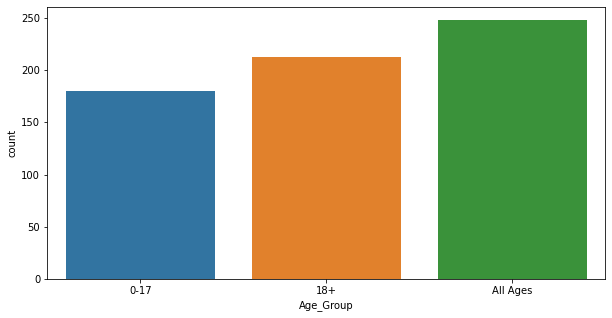

In [112]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age_Group',data=sub_mapped_data)

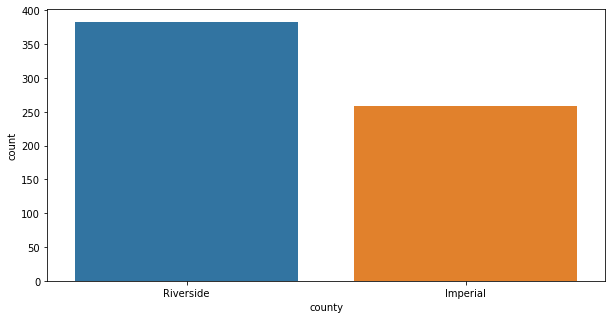

In [113]:
plt.figure(figsize=(10,5))
sns.countplot(x='county',data=sub_mapped_data)

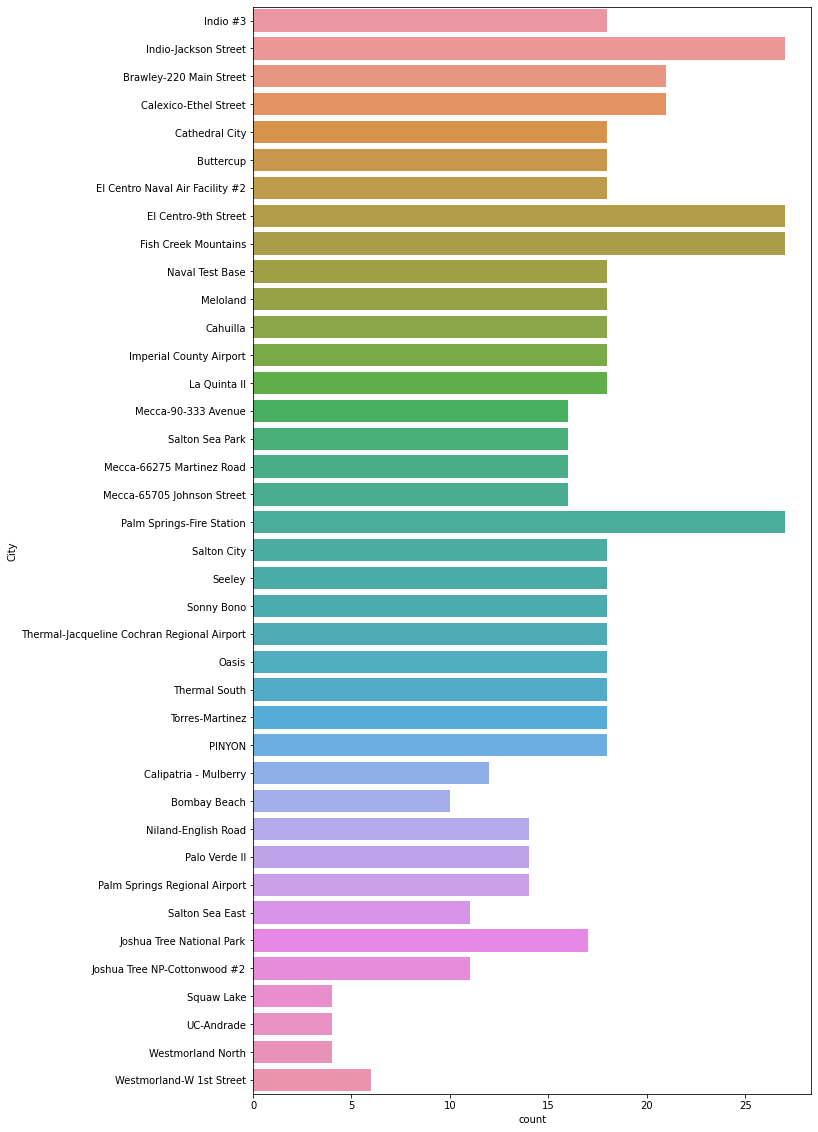

In [114]:
plt.figure(figsize=(10,20))
sns.countplot(y='City',data=sub_mapped_data)

In [115]:
cont_features=['Number_of_Asthma_ED_Visits',
       'Age_Adjusted_Rate_of_Asthma_ED_V', 
       'CO Annual Mean', 'NO2_Annual Mean', 'SO2_Annual Mean',
       'PM2.5_Wtd_Mean', 'PM10_Annual Mean', 'Temp_Maximum', 'Temp_1_Day_Average',
'Pressure_1_Day_Average_mph',
'Pressure_Maximum_mph',                
'Wind_Maximum_mph',                     
'Wind_1_Day_Average_mph',                
'Dewpoint_Maximum_degF',                 
'Dewpoint_1_Day_Average_degF',    
'CO_Maximum',                         
'NO2_Maximum',                          
'SO2_Maximum',                           
'O3_1_hr_maximum',                       
'O3_8_hr_maximum',                       
'PM25_Maximum',                          
'PM25_1_Day_Average',
'PM10_Maximum',                          
'PM10_1_Day_Average',                    
'Rel_Humidity_Maximum',                  
'Rel_Humidity_1_Day_Average','surface area',
       'error']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

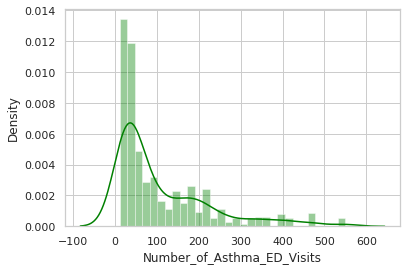

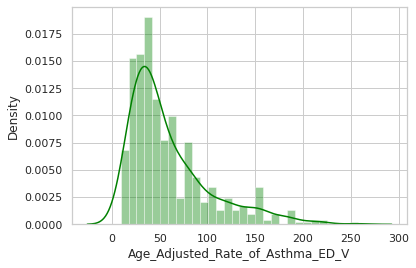

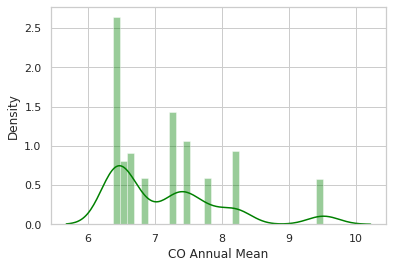

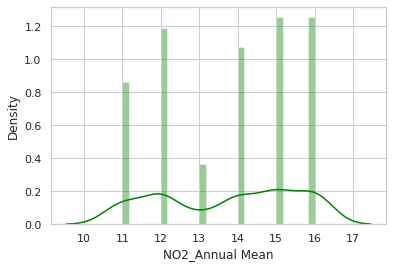

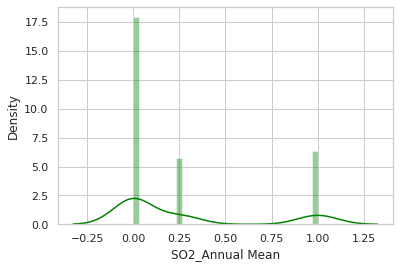

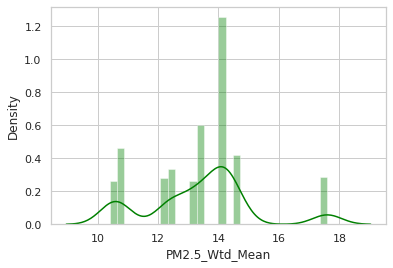

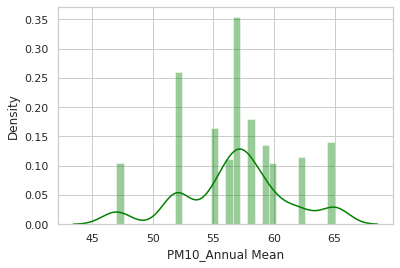

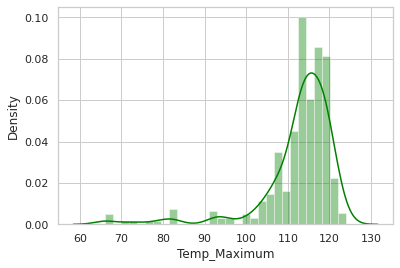

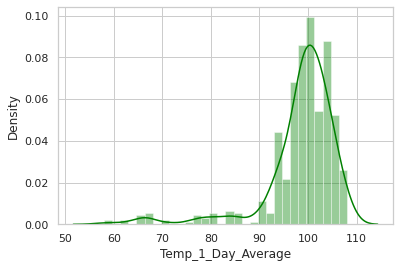

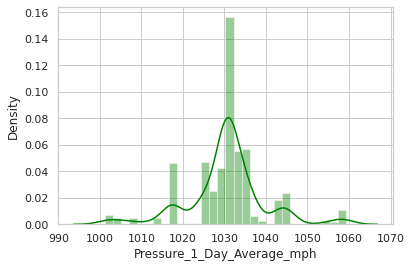

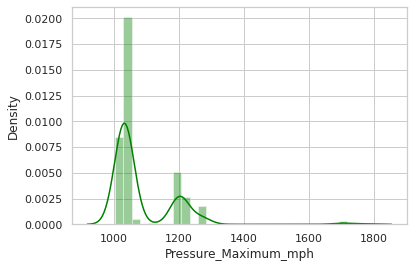

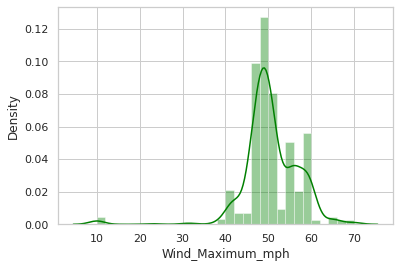

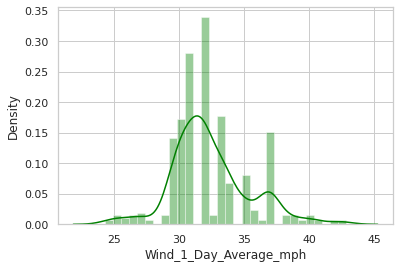

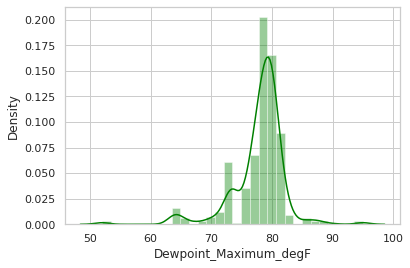

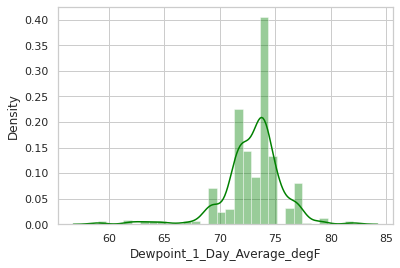

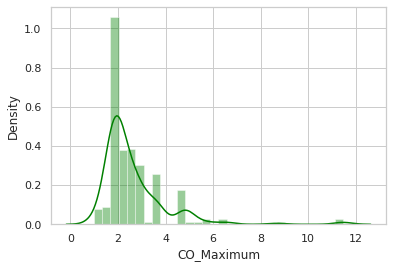

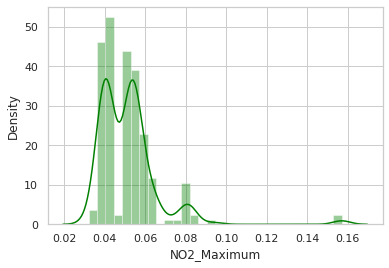

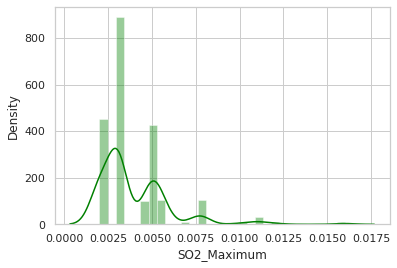

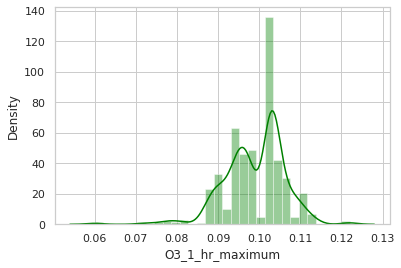

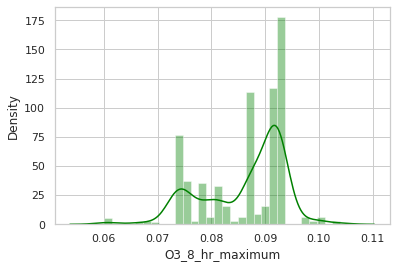

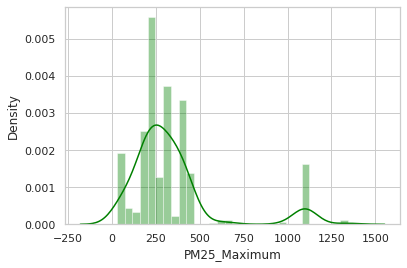

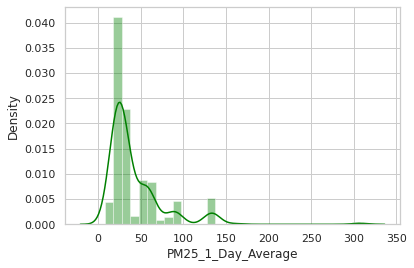

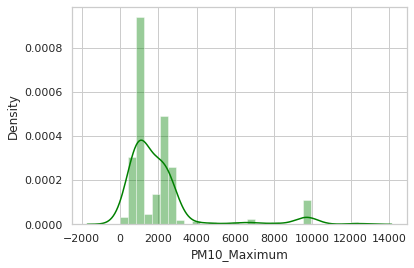

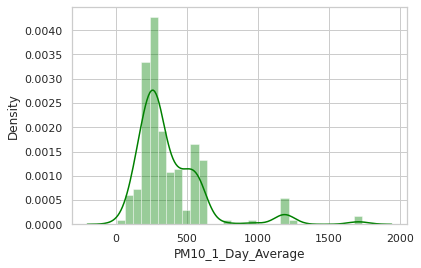

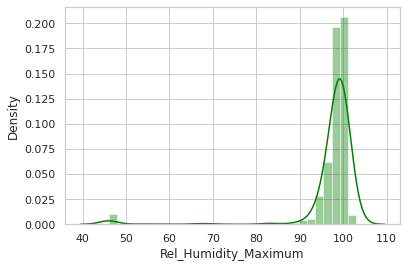

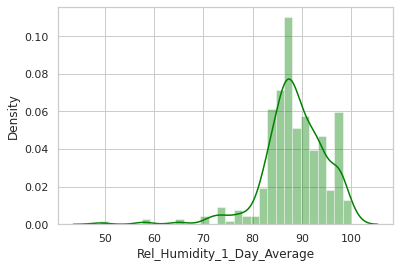

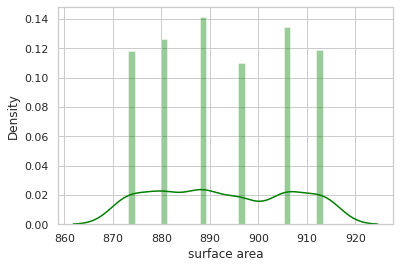

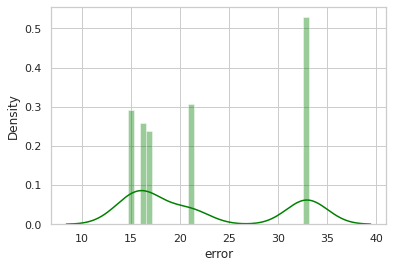

In [117]:
sns.set(style="whitegrid")
for i,cont in enumerate(cont_features):
    plt.figure(i)
    sns.distplot(sub_mapped_data[cont],hist=True,bins=30,color="green")

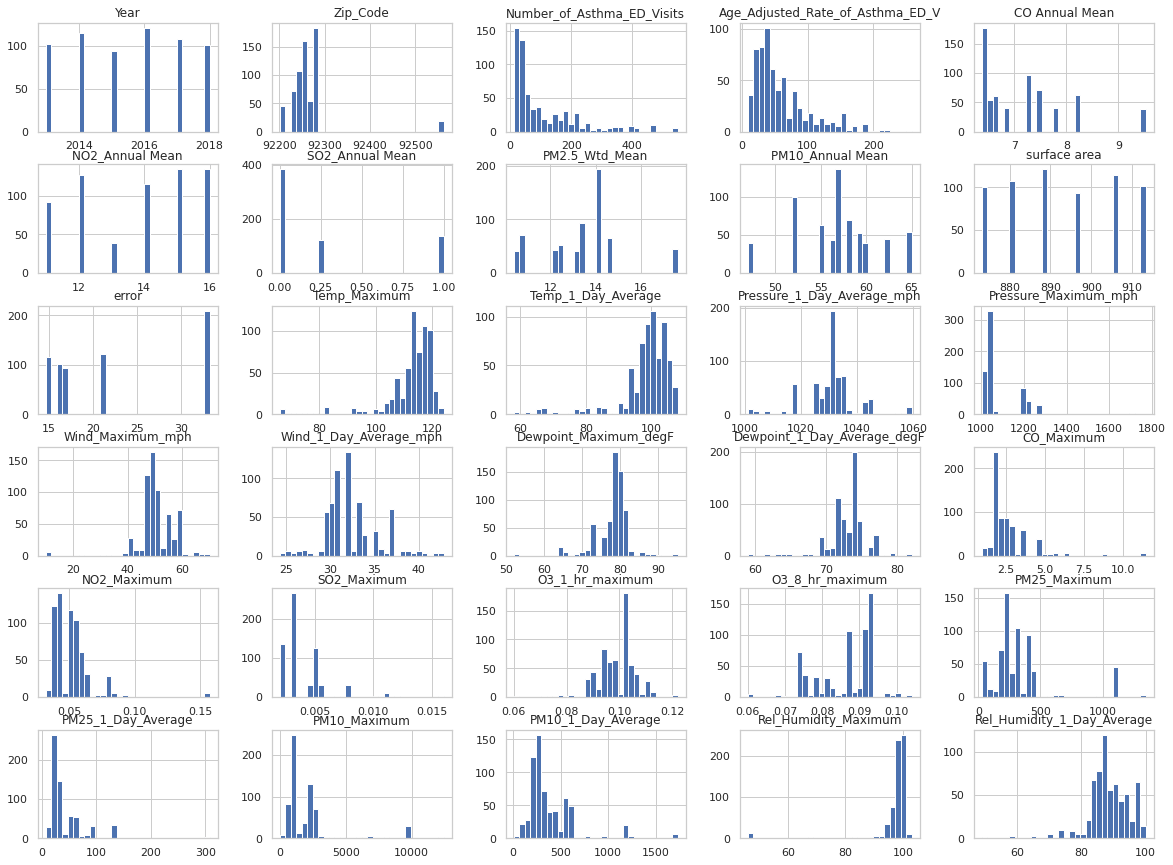

In [118]:
sub_mapped_data.hist(bins=30, figsize=(20,15))
plt.show()

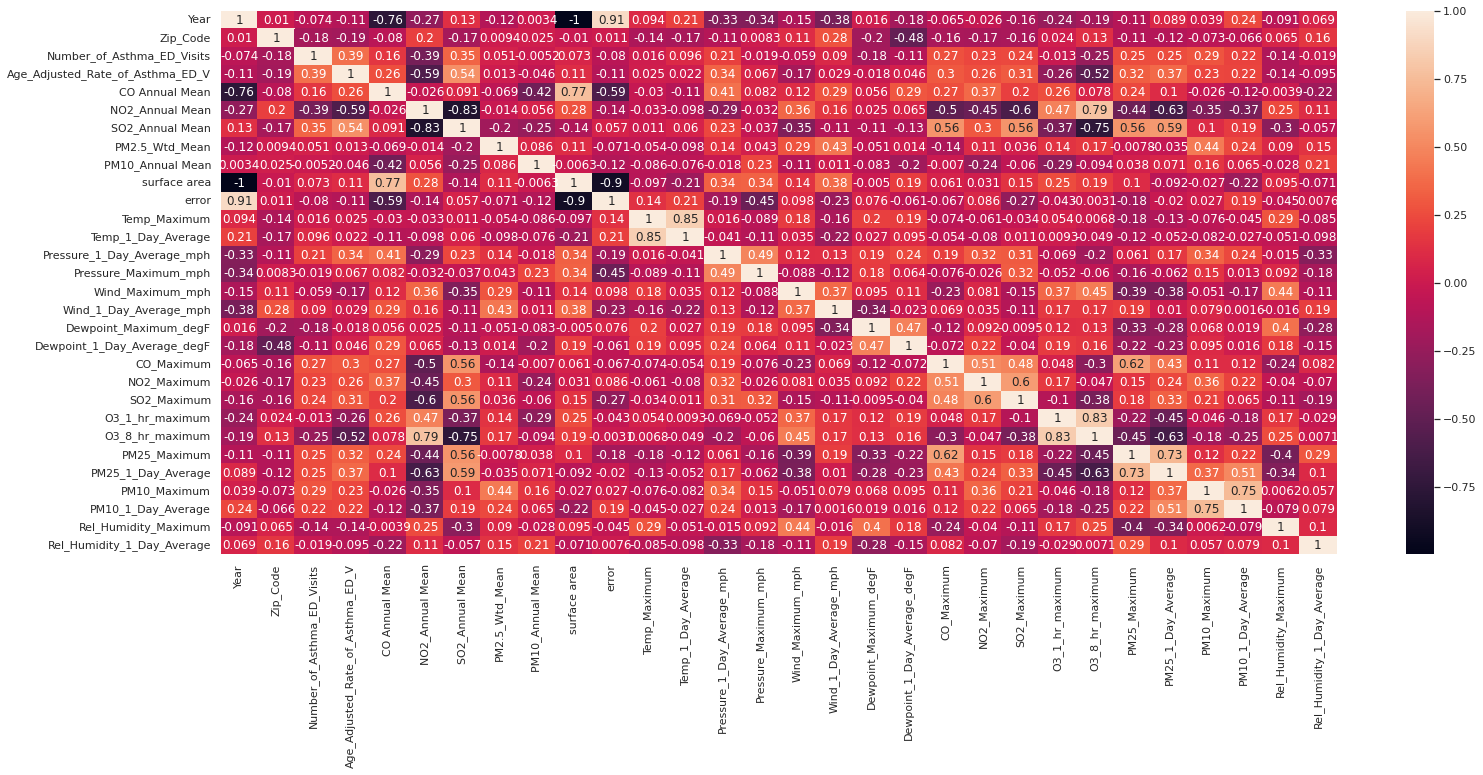

In [119]:
plt.figure(figsize=(25,10))
sns.heatmap(sub_mapped_data.corr(),annot=True,linecolor='white',linewidths=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

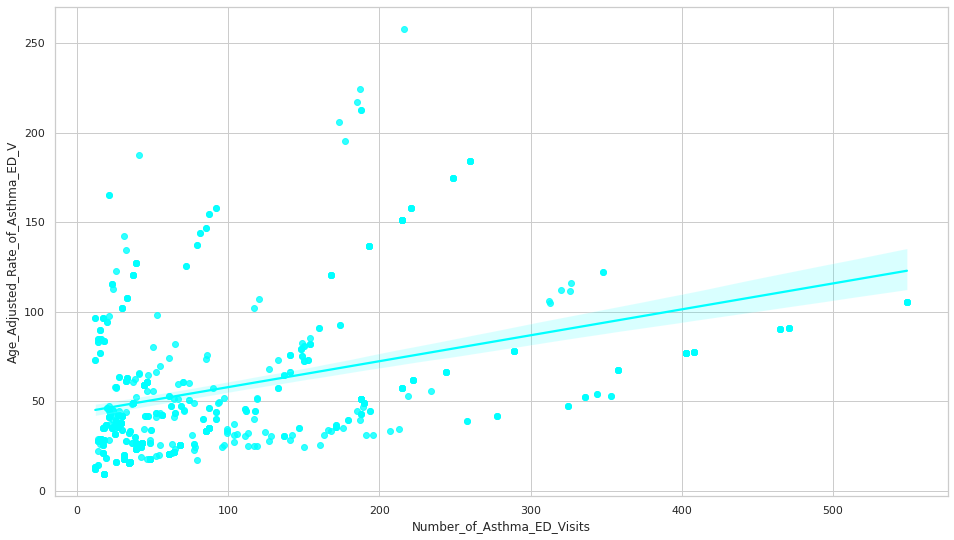

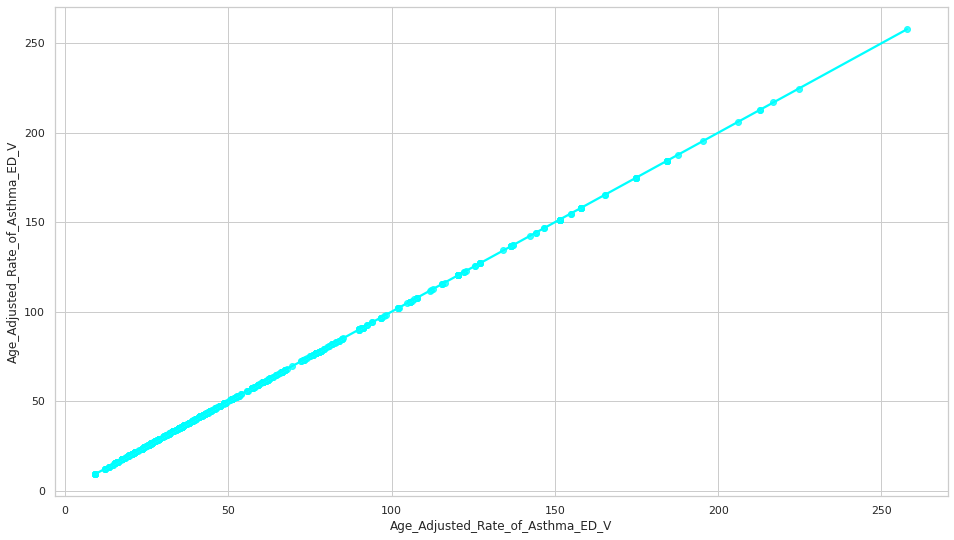

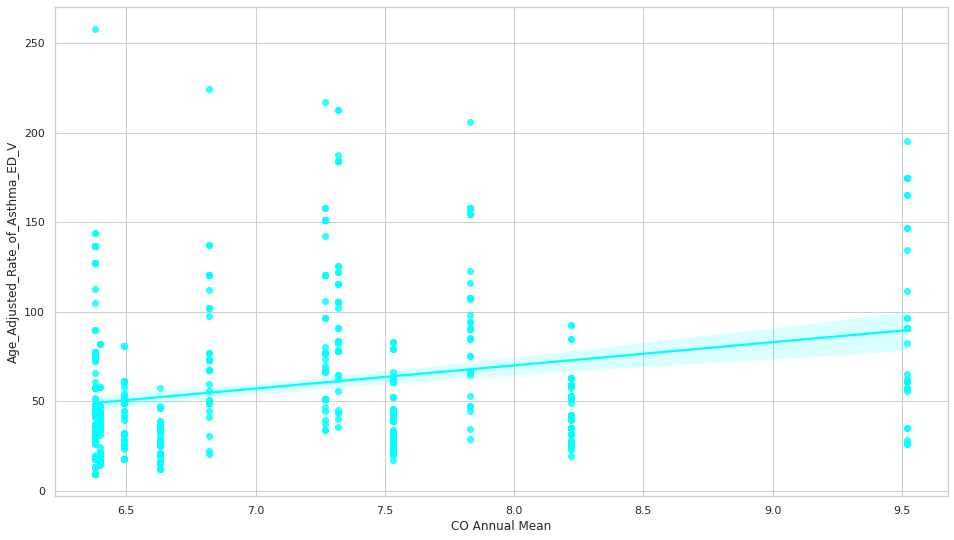

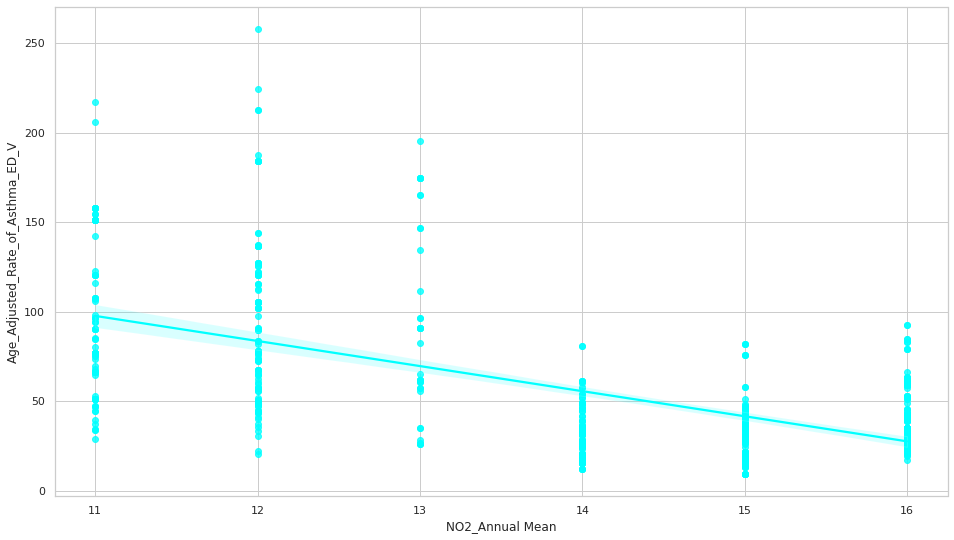

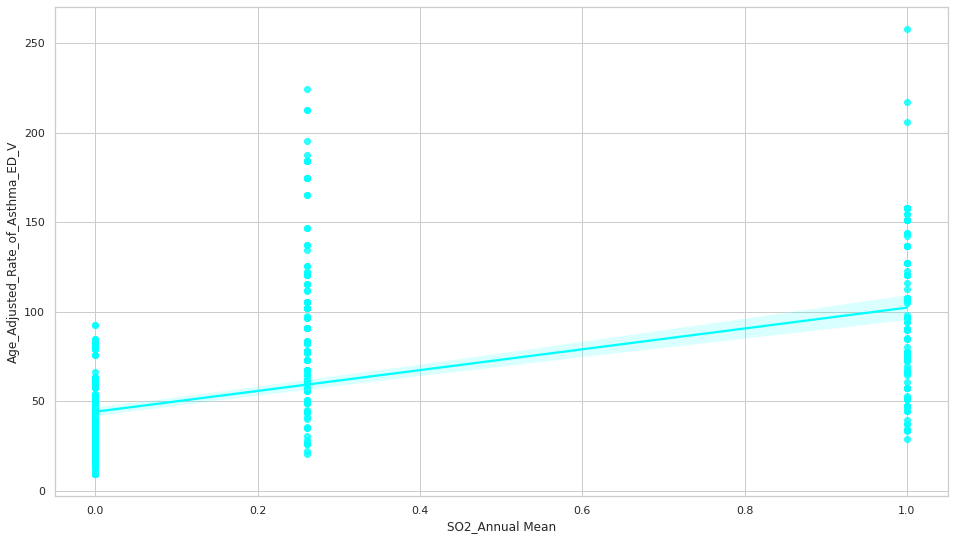

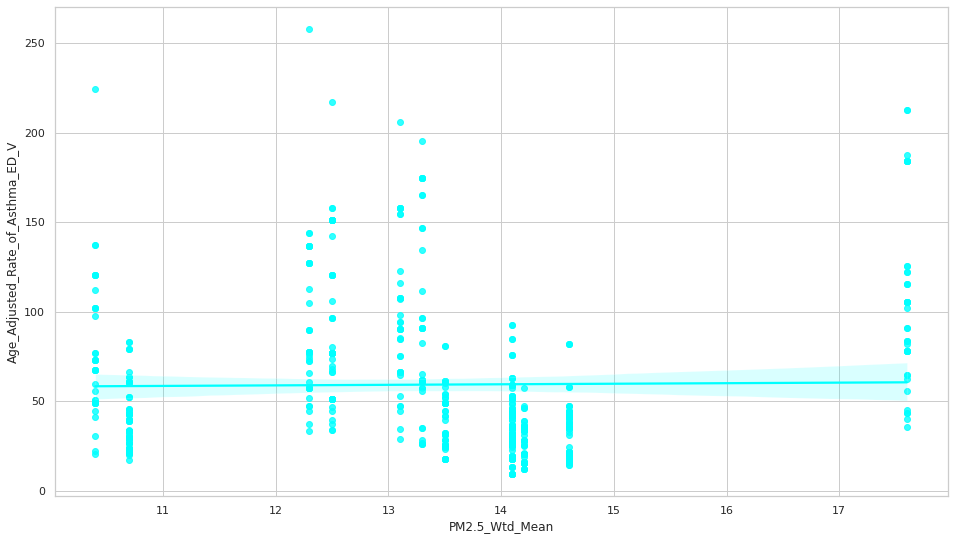

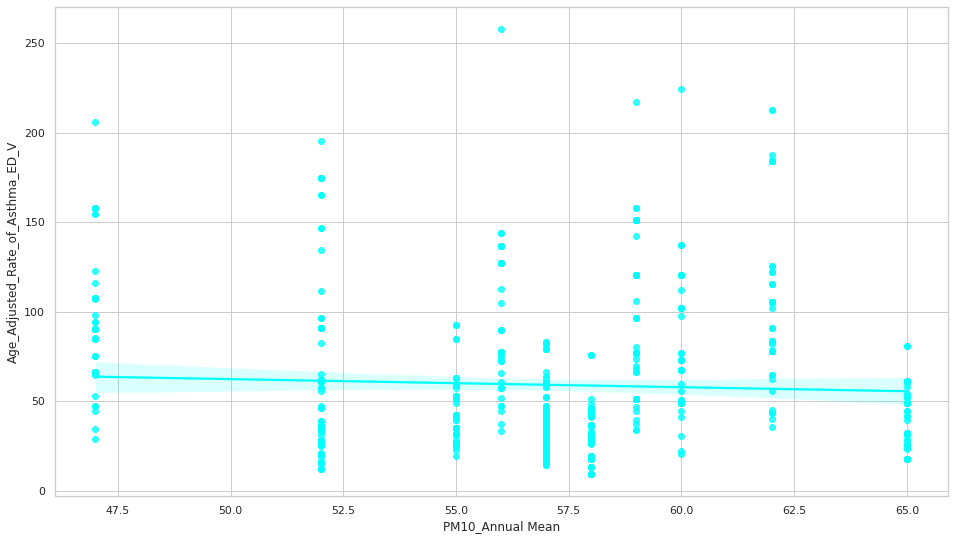

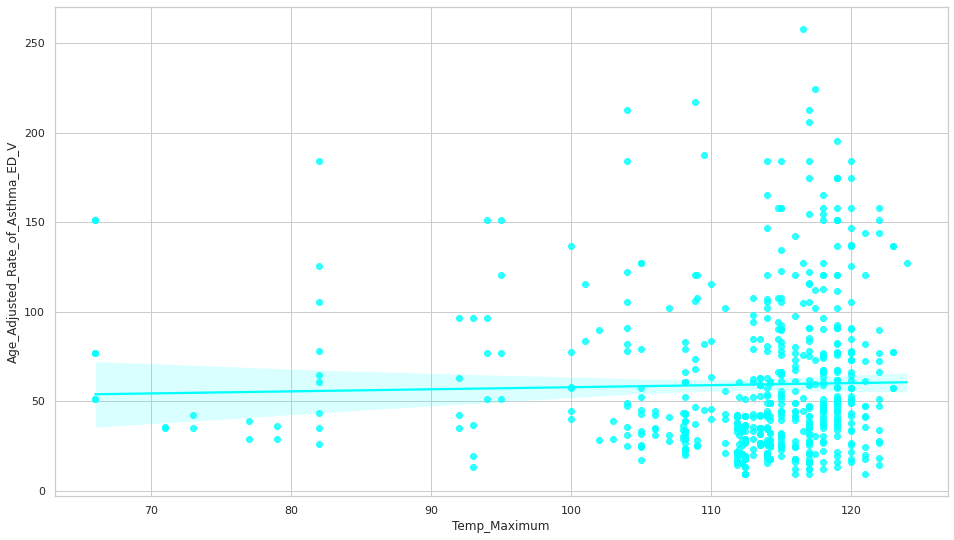

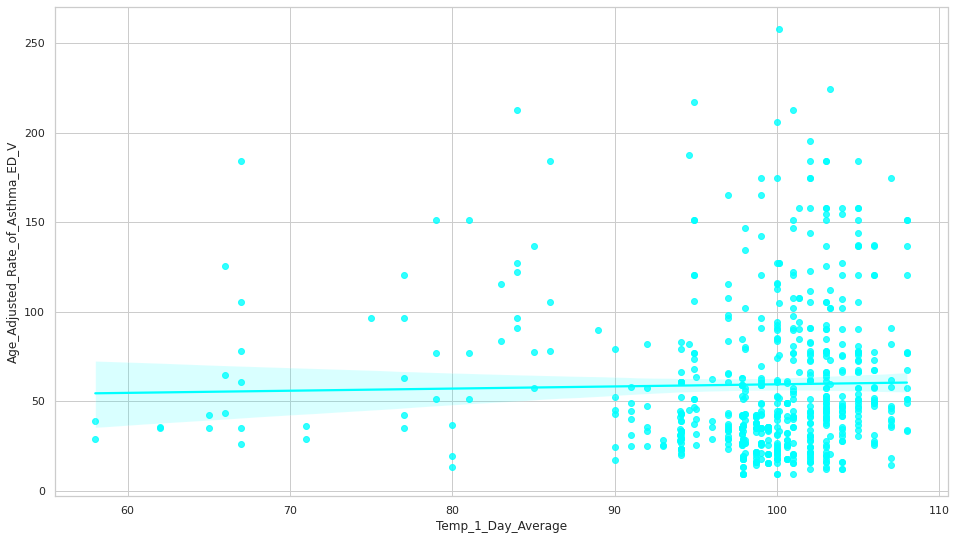

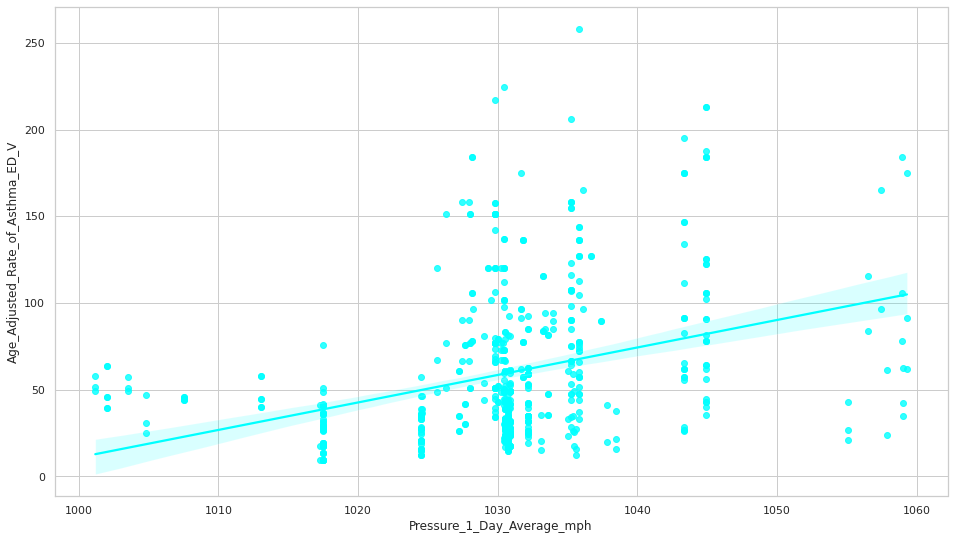

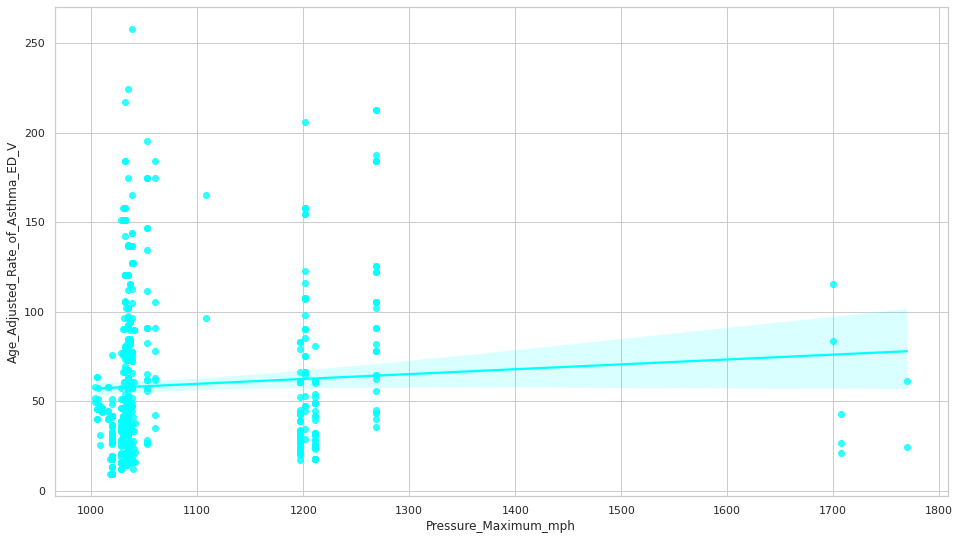

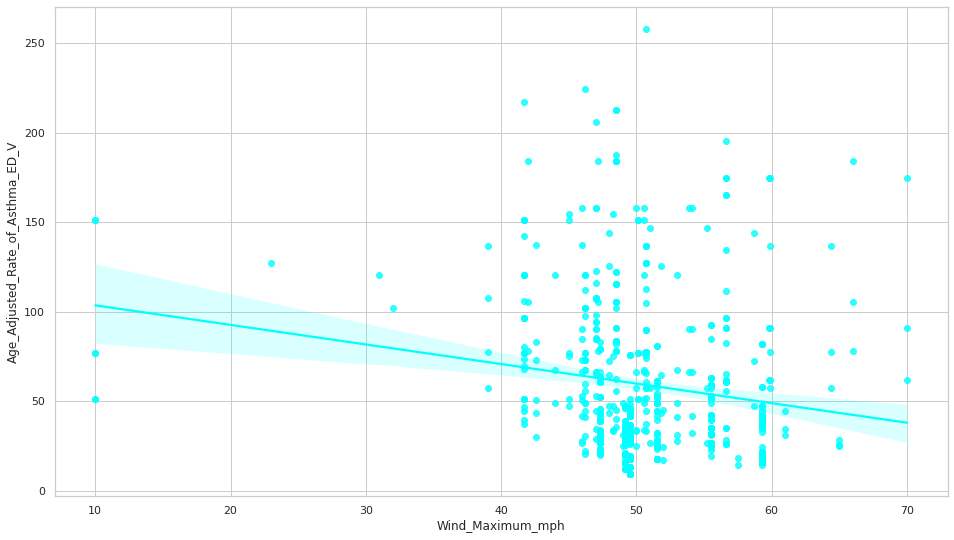

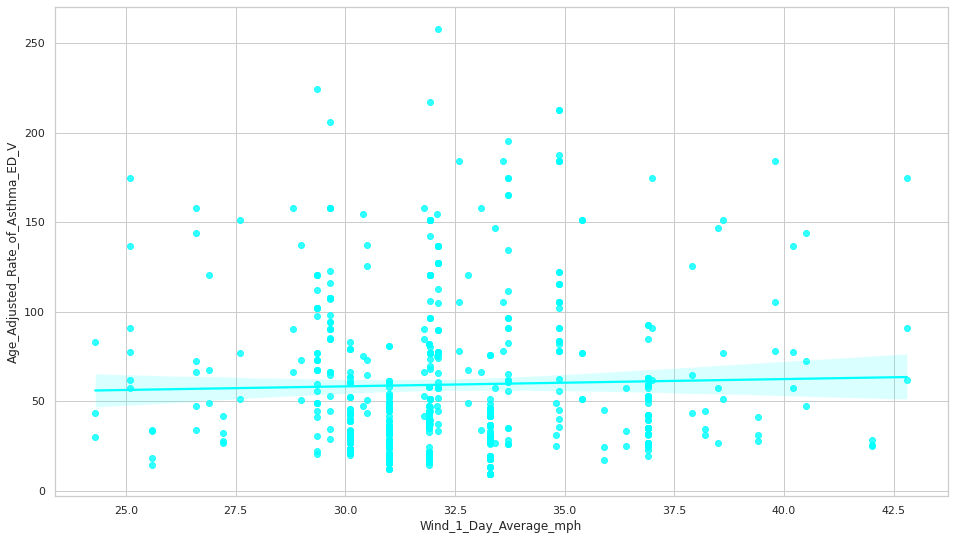

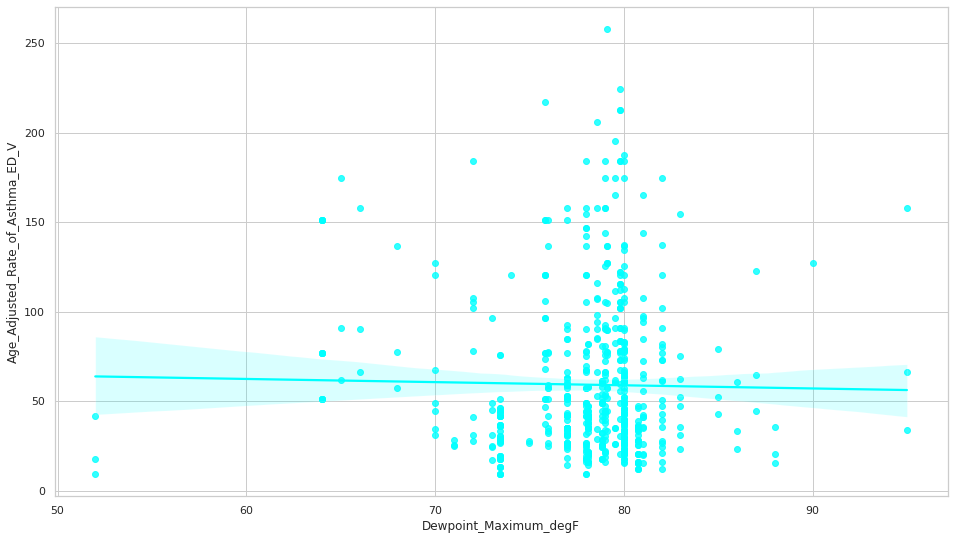

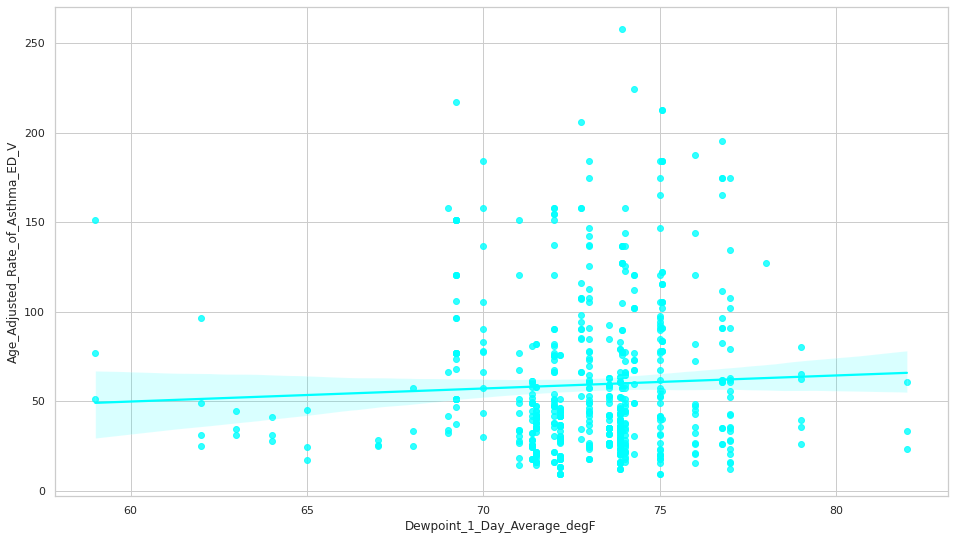

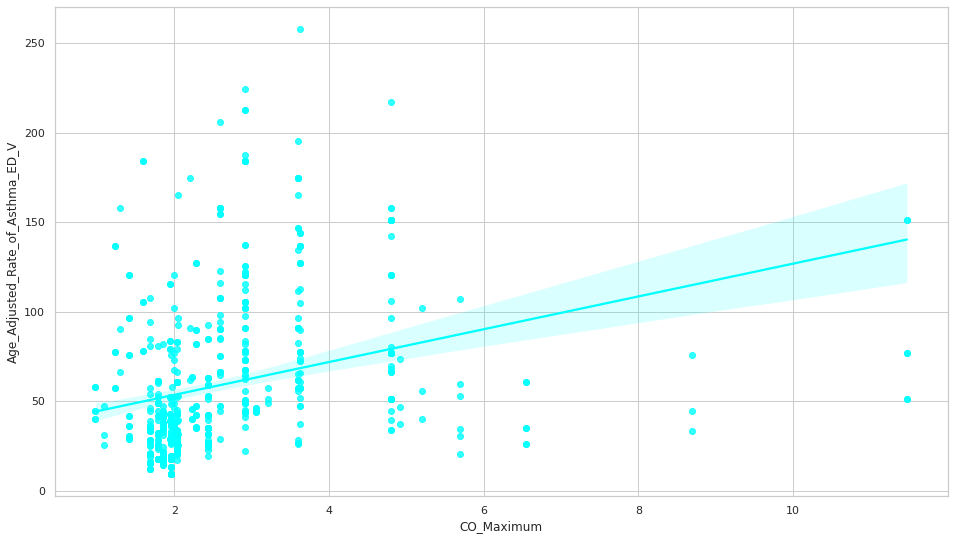

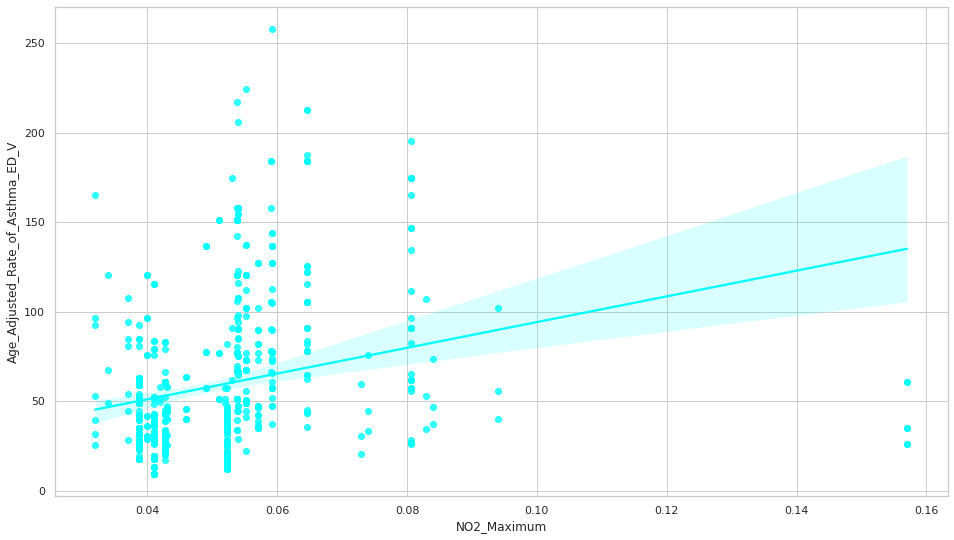

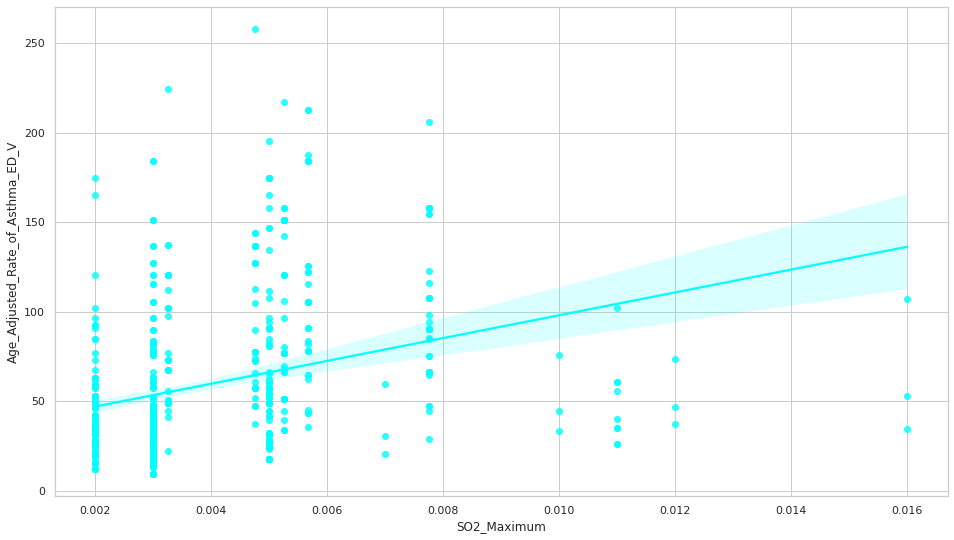

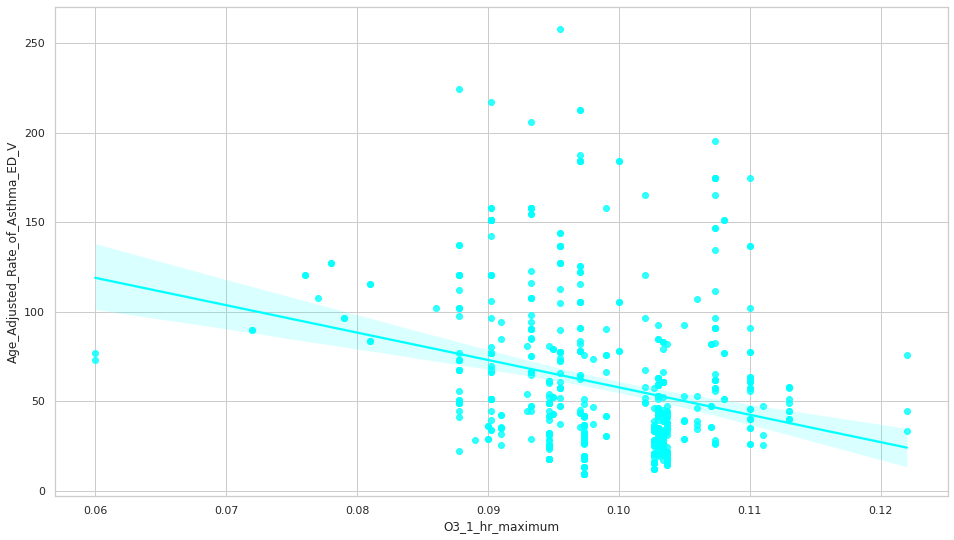

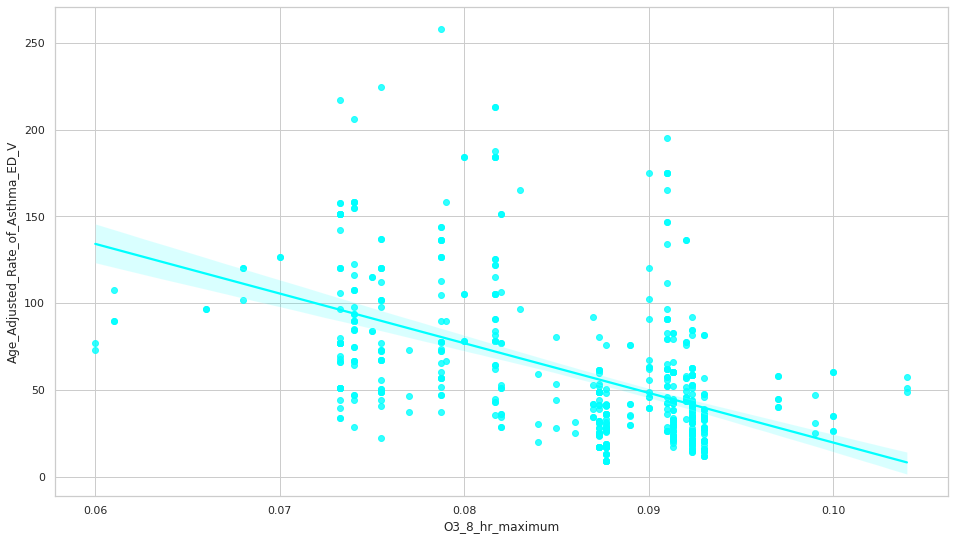

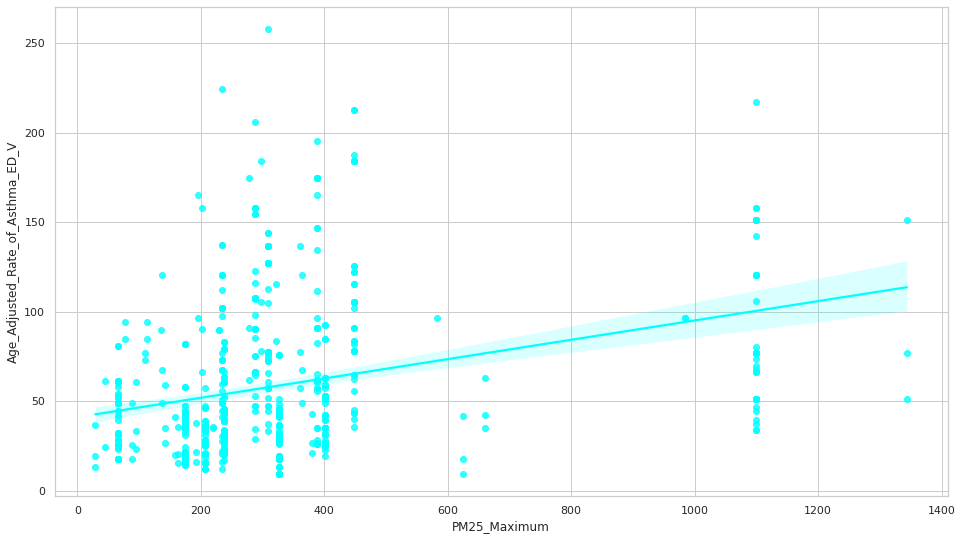

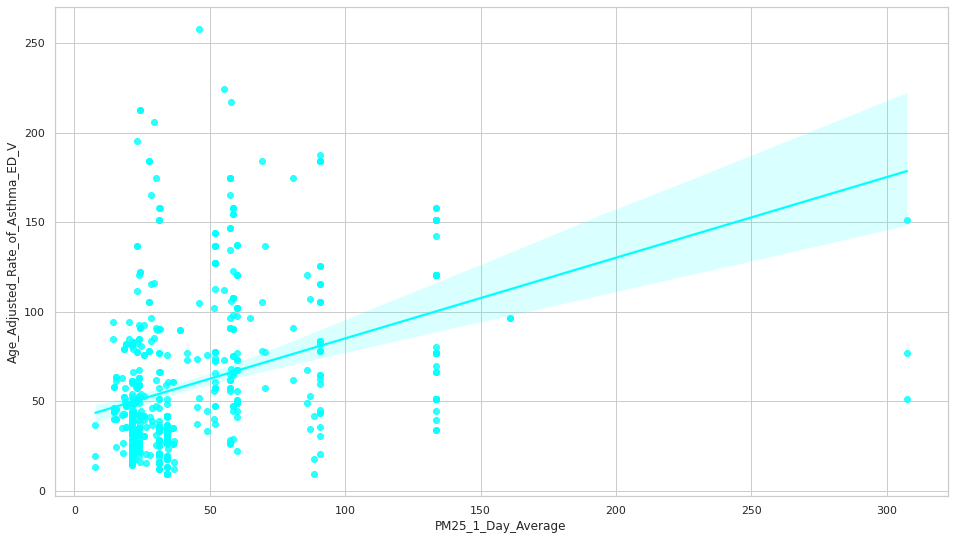

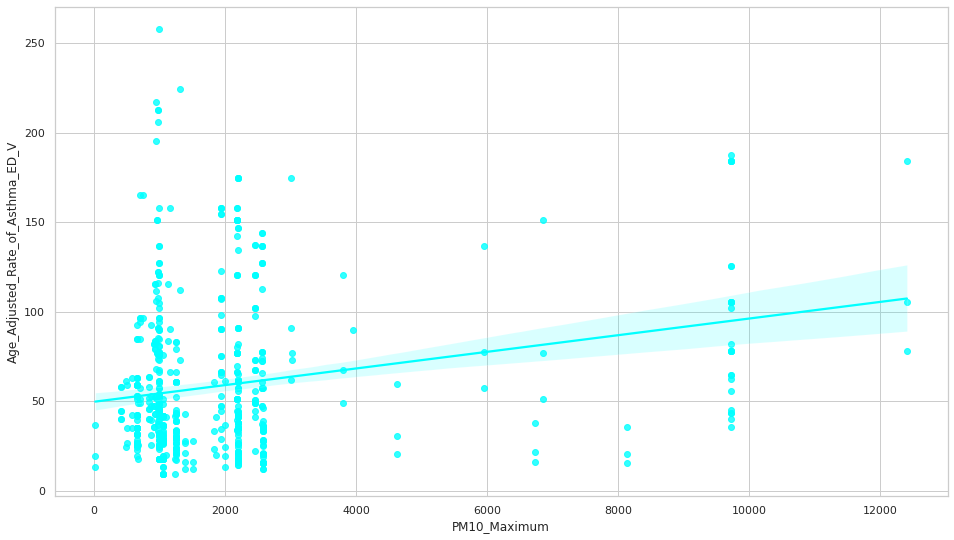

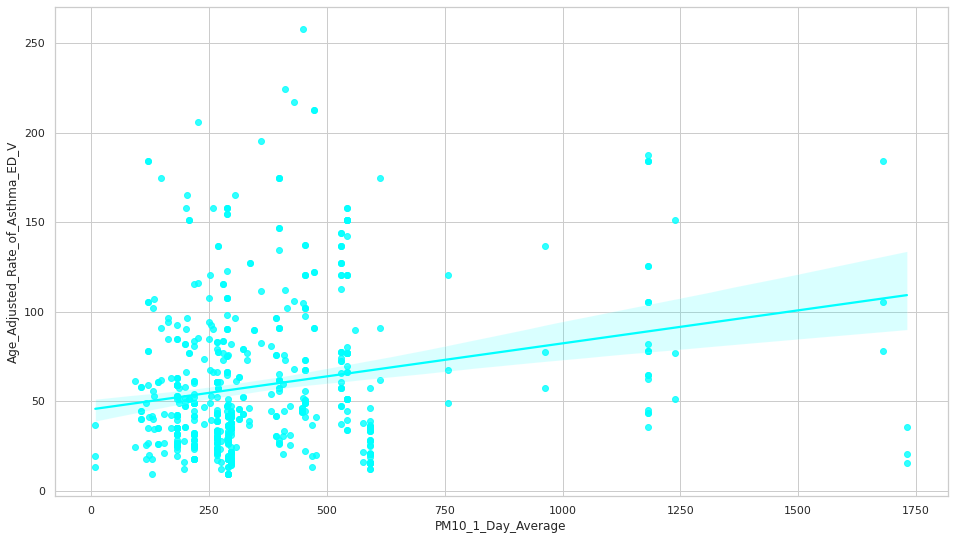

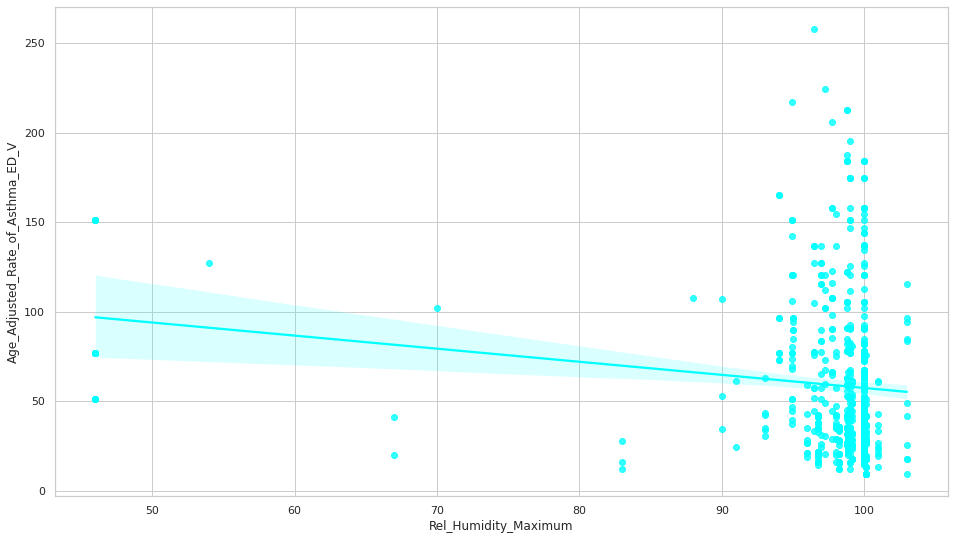

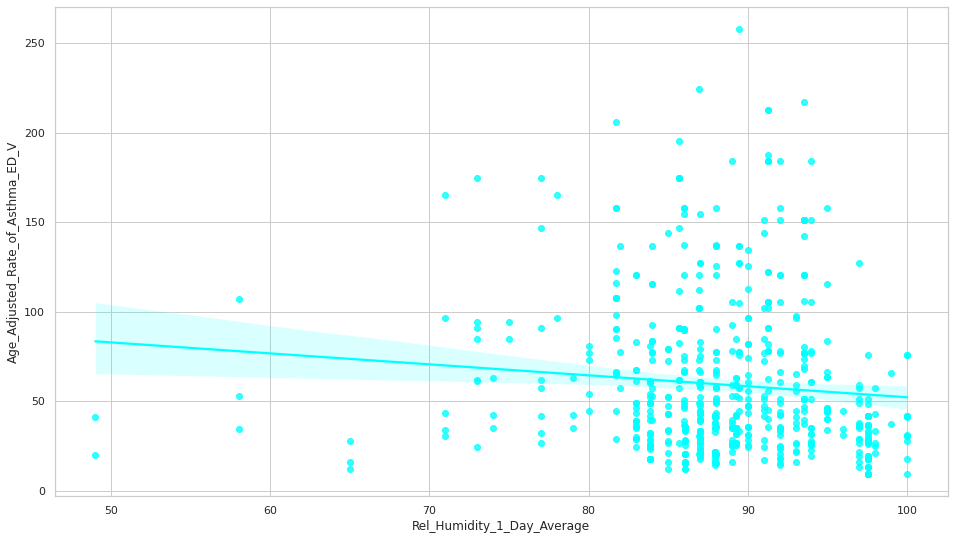

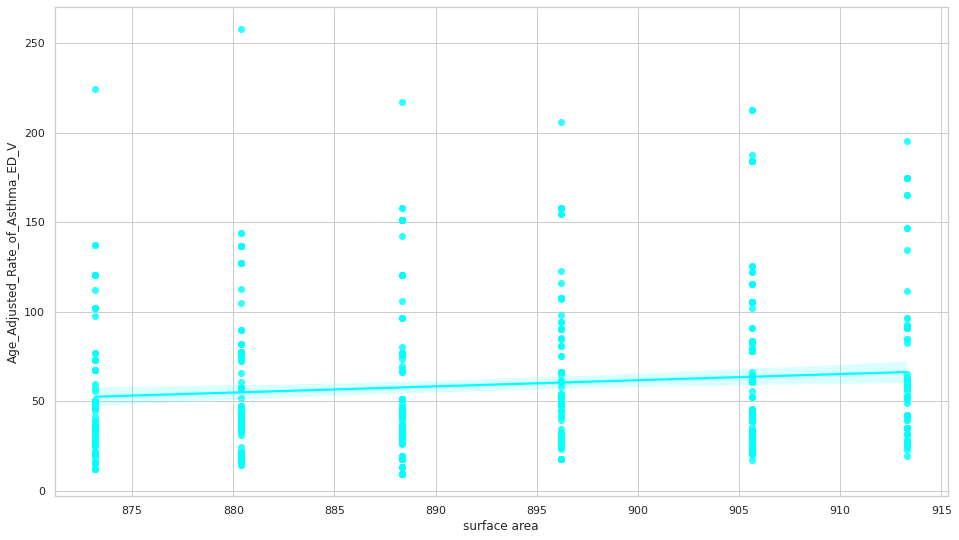

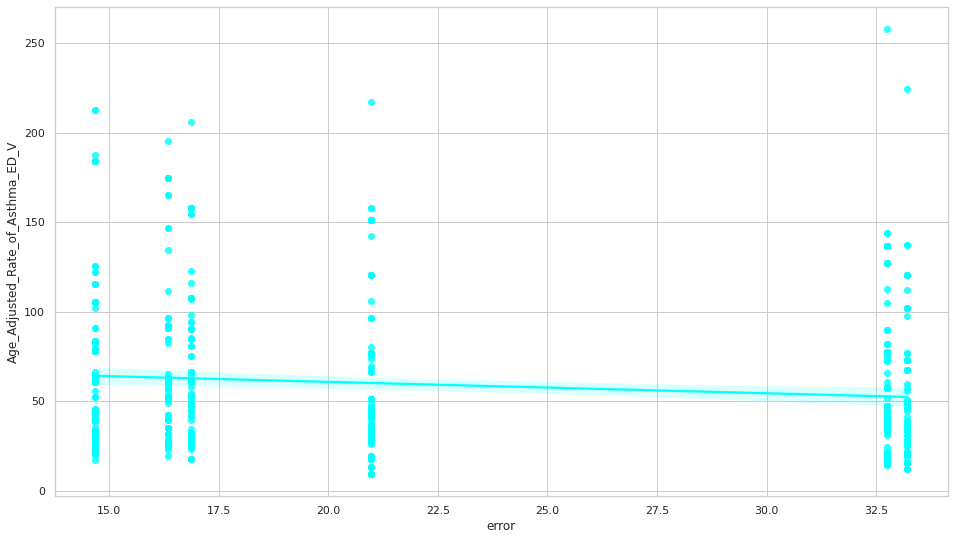

In [121]:
for feature in cont_features:
    plt.figure(figsize=(16, 9))
    sns.regplot(data=sub_mapped_data,x=feature, y='Age_Adjusted_Rate_of_Asthma_ED_V',color='cyan')